## Librerias

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

import requests
from bs4 import BeautifulSoup

# Jugadores reales

## EDA

#### Dataframe

In [7]:
df_u21 = pd.read_csv("../Datos/real_players_u21.csv")

In [8]:
#Vemos la forma de la tabla que vamos a usar, en este caso tiene 350 lineas y 12 columnas

df_u21.shape

(350, 11)

#### Separar las columnas numéricas

In [9]:
# Separamos las columnas numéricas

df_u21.select_dtypes("number").columns

Index(['Age', 'Market value', 'minutes_played', 'goals', 'assists',
       'height_in_cm'],
      dtype='object')

In [10]:
#Las organizamos por los valores únicos que tienen

df_u21.select_dtypes("number").nunique().sort_values(ascending=False)

minutes_played    334
Market value       42
height_in_cm       35
goals              34
assists            25
Age                 6
dtype: int64

In [11]:
#Vemos en este caso que Age tiene 6 valores unicos, la mayoria tiene 21 años, y los que menos tienen, 16

df_u21['Age'].value_counts()

Age
21    146
20     98
19     75
18     26
17      3
16      2
Name: count, dtype: int64

In [12]:
#creamos un df con solo valores numericos

numerical_colums= df_u21.select_dtypes(include=[np.number])
numerical_colums

,Age,Market value,minutes_played,goals,assists,height_in_cm
0,21,180.0,13820.0,47.0,38.0,186.0
1,21,130.0,10929.0,41.0,50.0,177.0
2,21,130.0,9175.0,43.0,31.0,184.0
3,17,120.0,2964.0,7.0,9.0,180.0
4,21,100.0,13733.0,4.0,13.0,182.0
...,...,...,...,...,...,...
345,20,3.0,1176.0,1.0,0.0,180.0
346,21,3.0,4030.0,2.0,9.0,183.0
347,20,3.0,2556.0,4.0,5.0,174.0
348,20,3.0,108.0,0.0,0.0,185.0


#### Separar las columnas categóricas

In [13]:
#Creamos un df con solo valores categoricos

categorical_columns = df_u21.select_dtypes(include='object')
categorical_columns

,Player,Nat.,Club,position,foot
0,Jude Bellingham,England,Real Madrid,Midfield,right
1,Florian Wirtz,Germany,Bayer 04 Leverkusen,Midfield,right
2,Jamal Musiala,Germany,Bayern Munich,Midfield,right
3,Lamine Yamal,Spain,FC Barcelona,Attack,left
4,Eduardo Camavinga,France,Real Madrid,Midfield,left
...,...,...,...,...,...
345,Dexter Lembikisa,Jamaica,Wolverhampton Wanderers U21,Defender,right
346,Anton Gaaei,Denmark,Ajax Amsterdam,Defender,right
347,Nikita Saltykov,Russia,Lokomotiv Moscow,Attack,right
348,Aljoscha Kemlein,Germany,1.FC Union Berlin,Midfield,right


#### Análisis categóricos

In [14]:
#En este caso vemos la frecuencia de las posiciones. Podemos ver que lo que mas hay son mediocampistas, seguido de atacantes, defensas y solo 4 porteros

frequency_table = df_u21['position'].value_counts()

proportion_table = df_u21['position'].value_counts(normalize=True)

frequency_table, proportion_table


(position
 Midfield      132
 Attack        116
 Defender       98
 Goalkeeper      4
 Name: count, dtype: int64,
 position
 Midfield      0.377143
 Attack        0.331429
 Defender      0.280000
 Goalkeeper    0.011429
 Name: proportion, dtype: float64)

<Axes: xlabel='position'>

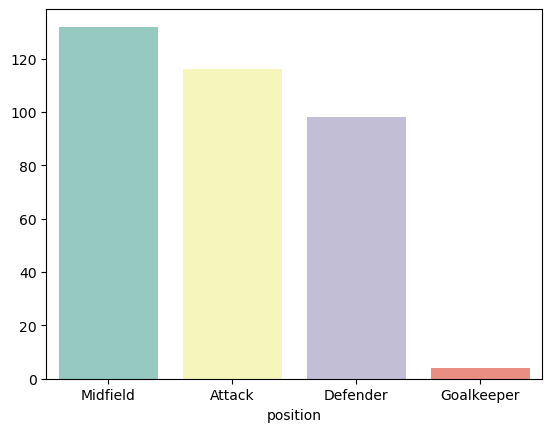

In [15]:
#En esta grafica podemos ver la distribución de los jugadores por posiciones

sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")

<Axes: ylabel='count'>

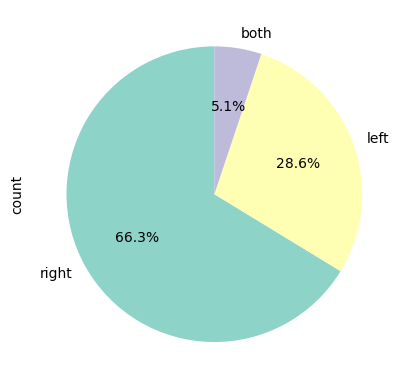

In [16]:
#En esta grafica podemos ver como se dividen los jugadores por su pie preferido

df_u21['foot'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

#### Análisis Numéricos

<Axes: xlabel='Age', ylabel='count'>

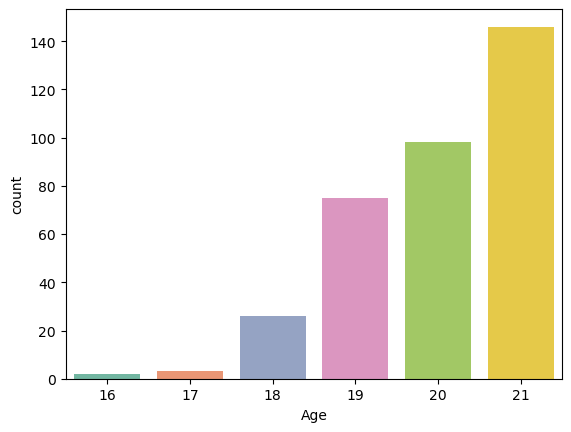

In [17]:
#En esta gráfica podemos ver la distrubición de los jugadores por cada grupo de edad

sns.countplot(data=df_u21, x='Age', palette="Set2")

In [18]:
#La media, la mediana y la moda de Market Value

mean_price = df_u21['Market value'].mean()
median_price = df_u21['Market value'].median()
mode_price = df_u21['Market value'].mode()[0]

mean_price, median_price, mode_price

(15.004285714285714, 8.0, 4.0)

In [19]:
#Más análisis de Market value

variance_price = df_u21['Market value'].var()
std_dev_price = df_u21['Market value'].std()
min_price = df_u21['Market value'].min()
max_price = df_u21['Market value'].max()
range_price = max_price - min_price
quantiles_price = df_u21['Market value'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(395.95995292673007,
 19.89874249611593,
 3.0,
 180.0,
 177.0,
 0.25     4.5
 0.50     8.0
 0.75    15.0
 Name: Market value, dtype: float64)

In [20]:
skewness_value = df_u21['Market value'].skew()
kurtosis_value = df_u21['Market value'].kurtosis()

skewness_value, kurtosis_value

(4.044574583920503, 22.409834854643197)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Market value'}>],
       [<Axes: title={'center': 'minutes_played'}>,
        <Axes: title={'center': 'goals'}>],
       [<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'height_in_cm'}>]], dtype=object)

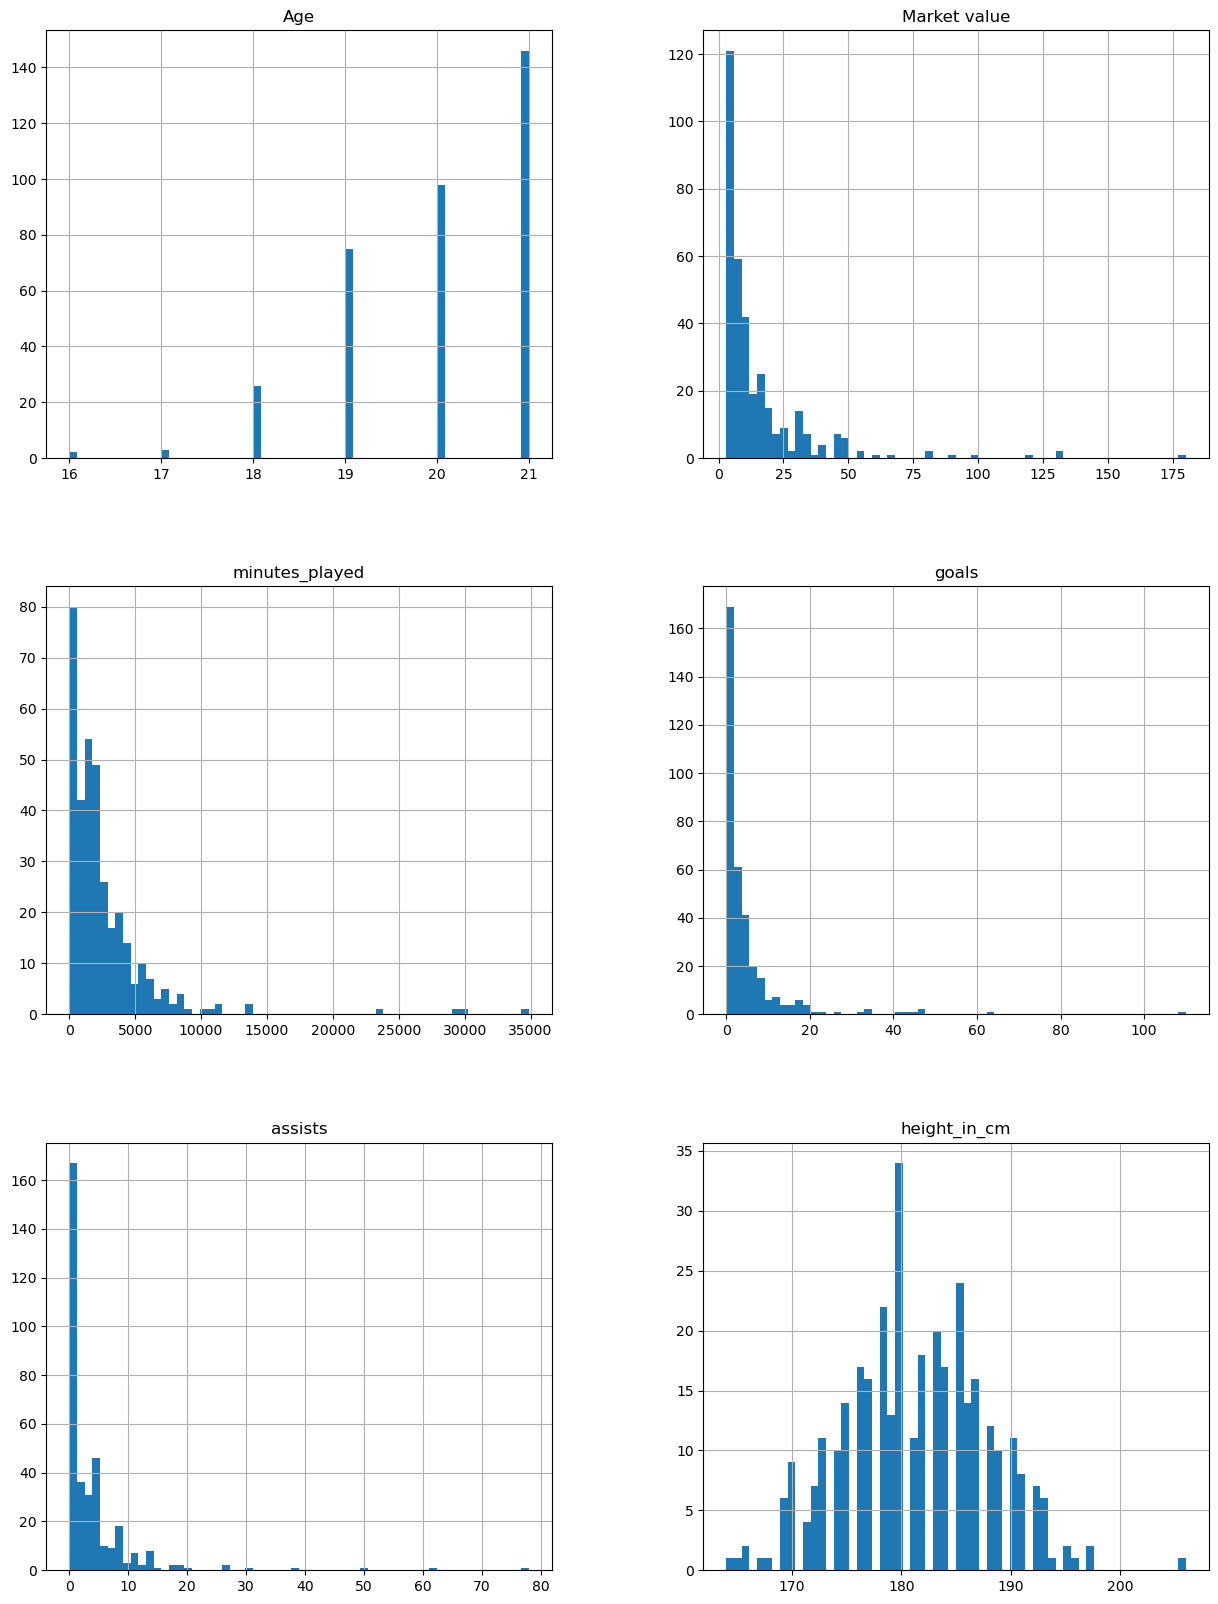

In [21]:
#Graficos de las columnas numéricas

numerical_colums.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)

<Axes: >

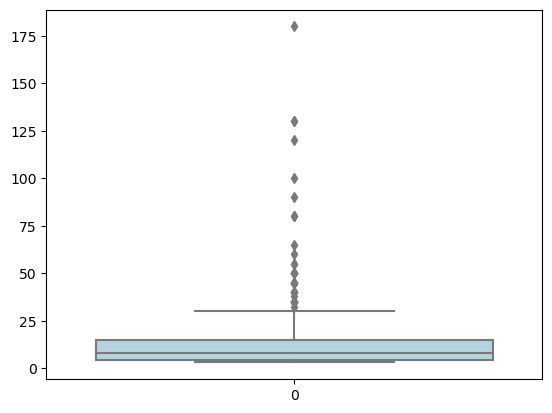

In [22]:
#Boxplot de Market Value. Lo que nos dice que la mayoria de los valores estan aprox entre 0 y 25

sns.boxplot(data = df_u21['Market value'], color="lightblue")

In [23]:
#Crosstab de las posiciones por edades 

crosstab_result =pd.crosstab(df_u21['position'], df_u21 ['Age'])
crosstab_result

Age,16,17,18,19,20,21
position,,,,,,
Attack,1,1,11,29,30,44
Defender,0,1,5,20,27,45
Goalkeeper,0,0,1,1,1,1
Midfield,1,1,9,25,40,56


In [24]:
from scipy.stats import chi2_contingency
chi2_statistics, chi_p_value, _, _ = chi2_contingency (crosstab_result)
chi2_statistics, chi_p_value

(6.716131308486199, 0.9650534874354691)

In [25]:
from scipy.stats.contingency import association
association (crosstab_result, method = 'cramer')

0.07997696875908475

<Axes: xlabel='position'>

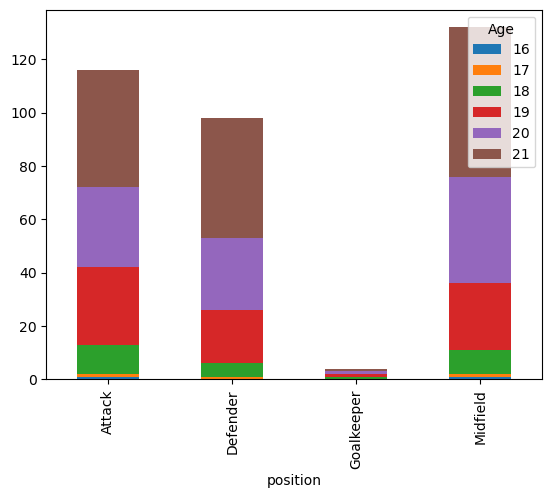

In [26]:
#Grafico de barras apiladas viendo las diferentes edades por cada posicion

crosstab_result.plot (kind="bar", stacked = True)

<Axes: xlabel='Age', ylabel='count'>

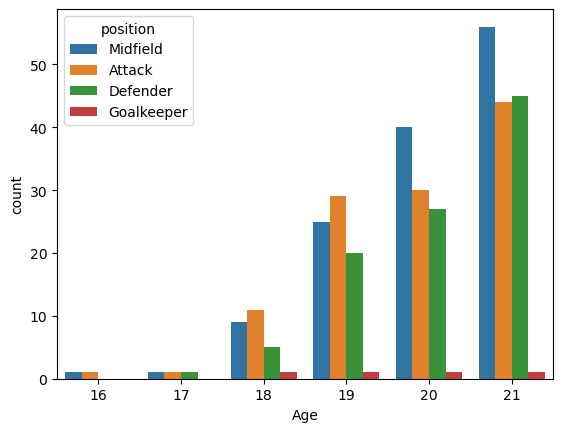

In [27]:
#Grafico de barras con las edades y los numeros de jugadores por posición

sns.countplot(data=df_u21, x='Age', hue='position')

<Axes: xlabel='Age', ylabel='position'>

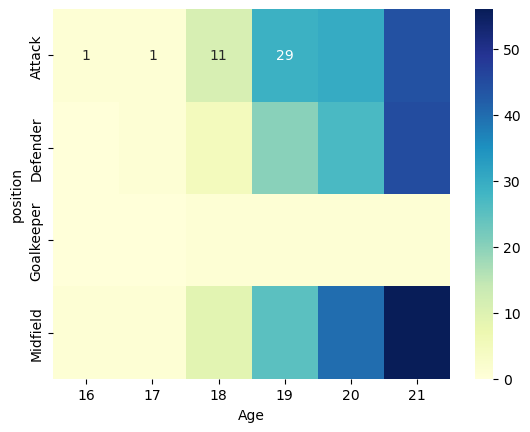

In [28]:
#Heatmap de Position y Age. Se aprecia que cada grupo la mauoria está en los 21 años

sns.heatmap (crosstab_result, annot=True, cmap="YlGnBu", fmt="d")

<Axes: xlabel='Age', ylabel='height_in_cm'>

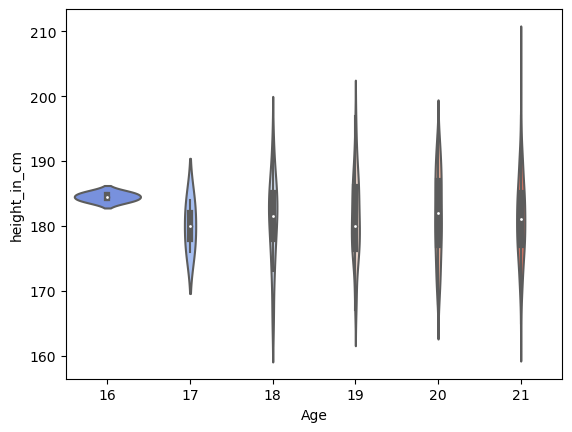

In [29]:
# Es un gráfico de violín entre la altura y la edad. En 21 al haber muchos datos se ve tan alargado porque hay diferentes alturas, 
# mientras en 16, hay solo dos y deben tener casi las misma estatura

sns.violinplot (data=df_u21, x= 'Age', y= 'height_in_cm', palette='coolwarm')

<Axes: xlabel='position', ylabel='Age'>

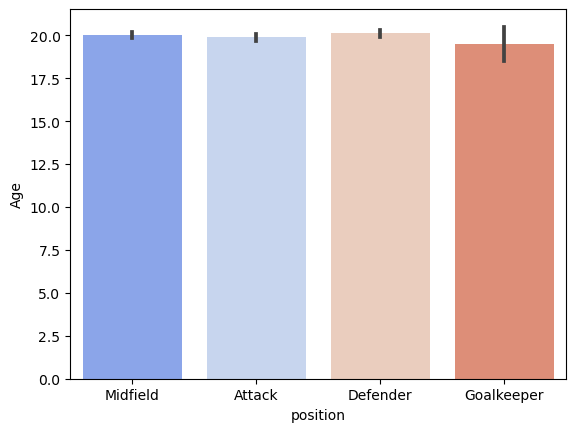

In [30]:
#Barplot con el promedio de edad de cada grupo de jugadores agrupados por posición

sns.barplot (data=df_u21, x= 'position', y= 'Age', palette='coolwarm')

In [31]:
#Creamos un grupo de las Top 5 nacionalidades para poder analizar mejor el gráfico

top_nationalities = df_u21['Nat.'].value_counts().nlargest(5).index

<Axes: xlabel='Nat.', ylabel='Age'>

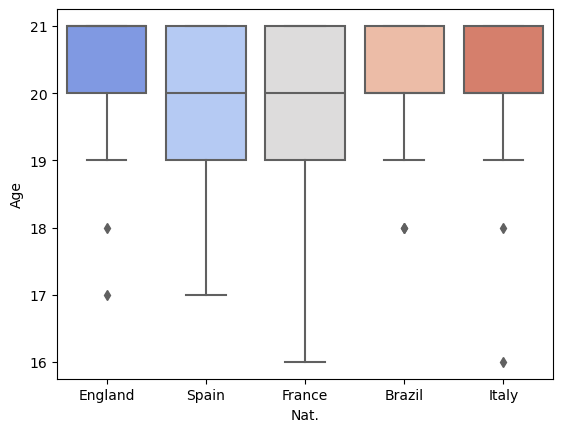

In [32]:
#Creamos un boxplot con el Top 5 de nacionalidades, en este caso vemos que en todos, la tendencia es 21 años

sns.boxplot(data=df_u21[df_u21['Nat.'].isin(top_nationalities)], x='Nat.', y='Age', palette='coolwarm')

#### Coorrelaciones 

In [33]:
#La correlación entre goals y Market value

correlation = df_u21['goals'].corr(df_u21['Market value'])
correlation

0.42461544966100373

In [34]:
#La correlación entre goals y Market value con el método spearman

correlation = df_u21['goals'].corr(df_u21['Market value'], method='spearman')
correlation

0.4545567802432554

In [35]:
#La correlación entre Market value y los elementos numéricos del df

spearman_correlations = numerical_colums.corrwith(df_u21['Market value'], method='spearman')


spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)


spearman_correlations_sorted

Market value      1.000000
minutes_played    0.494980
goals             0.454557
assists           0.376984
height_in_cm      0.035190
Age               0.011563
dtype: float64

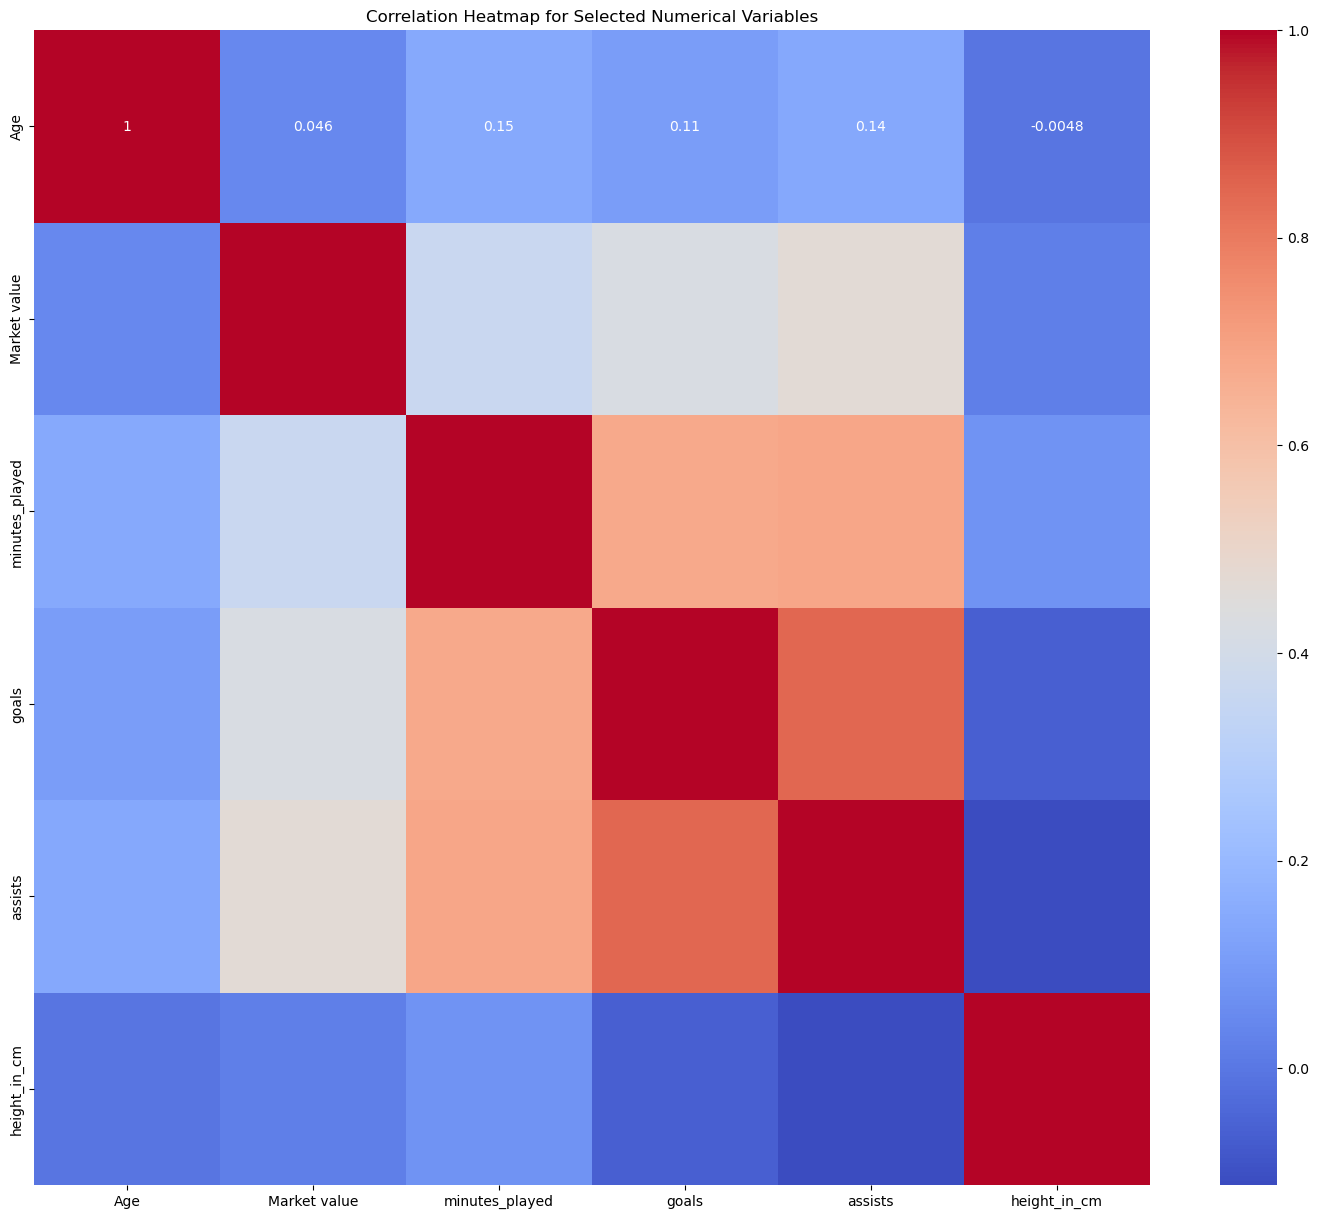

In [36]:
#Un matrix de correlación de los elementos numéricos de nuestro df

correlation_matrix = numerical_colums.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

<Axes: xlabel='goals', ylabel='Market value'>

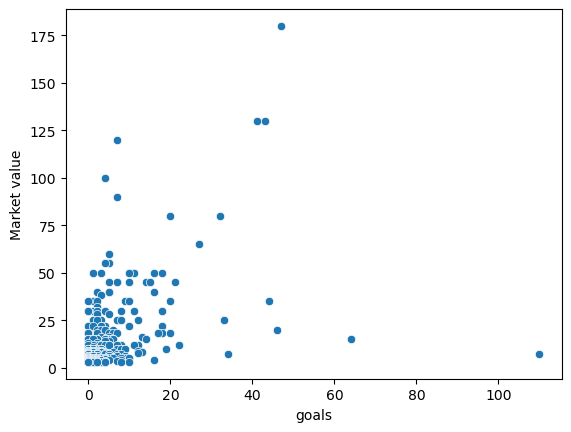

In [37]:
#Un scratterplor de goles y Market value

sns.scatterplot(data=df_u21, x='goals', y='Market value')

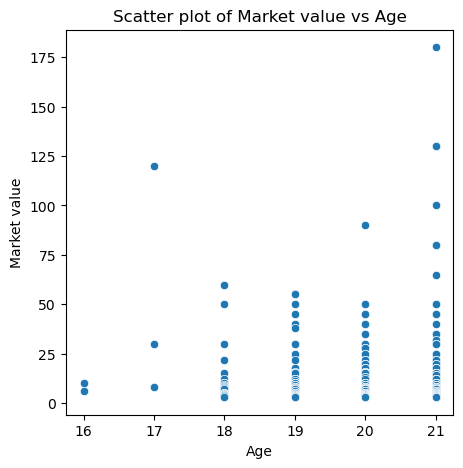

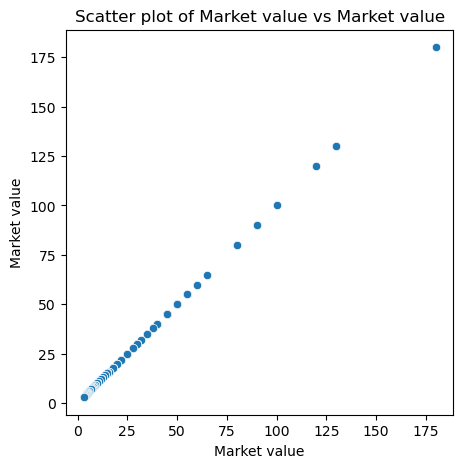

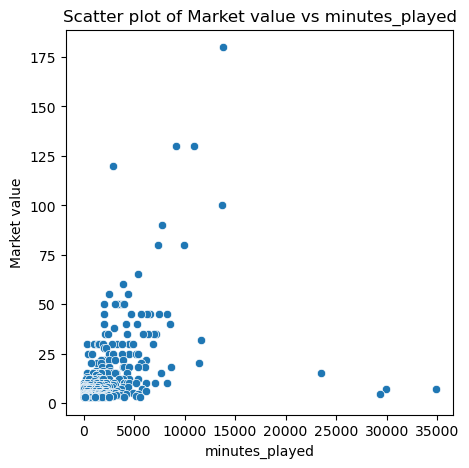

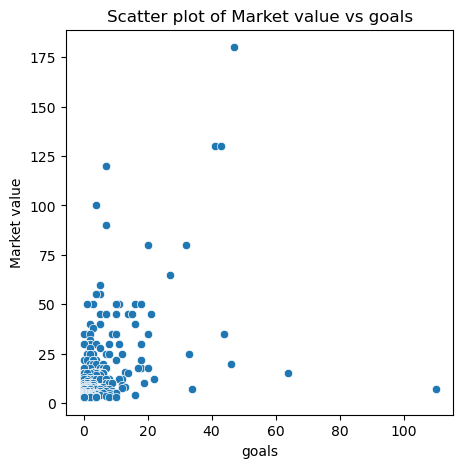

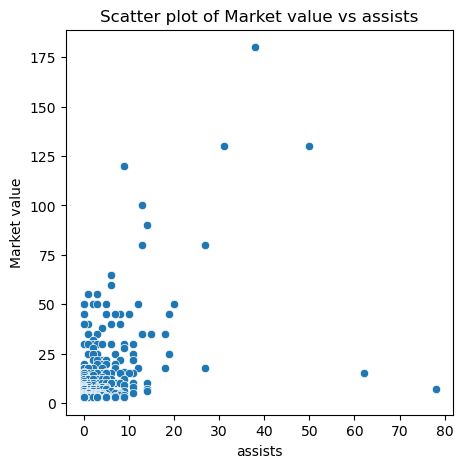

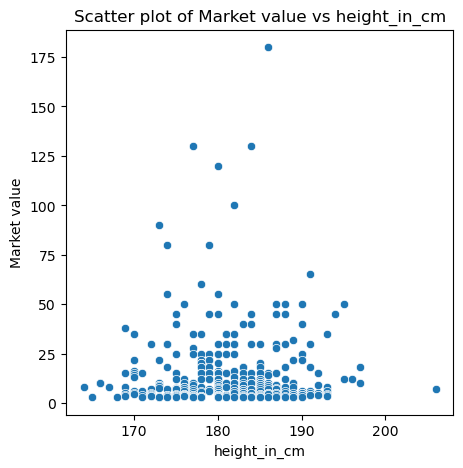

In [38]:
#Graficos para ver la relación entre Market Value y el resto de elementos numéricos

for col in numerical_colums.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Market value vs ' + col)
    sns.scatterplot(data=df_u21, x=col, y='Market value')
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


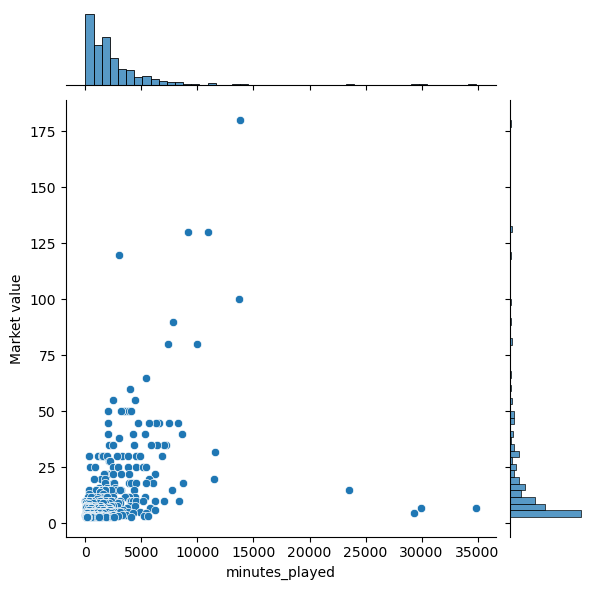

In [39]:
#Joinplot entre Market value y minutos jugados, los dos elementos que mas correlación tienen

sns.jointplot(y=numerical_colums['Market value'], x=numerical_colums['minutes_played'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


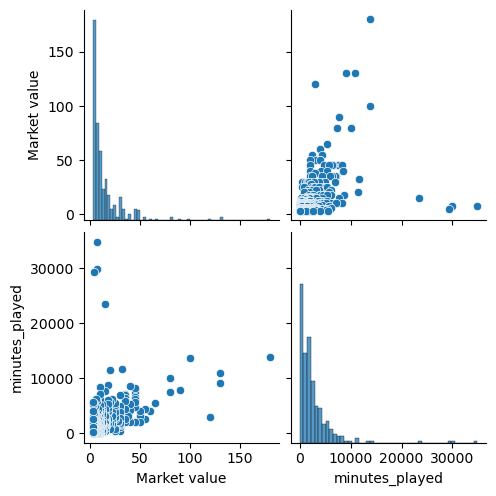

In [40]:
#Pairplot entre Market value y minutos jugados

sns.pairplot(df_u21[["Market value", "minutes_played"]])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


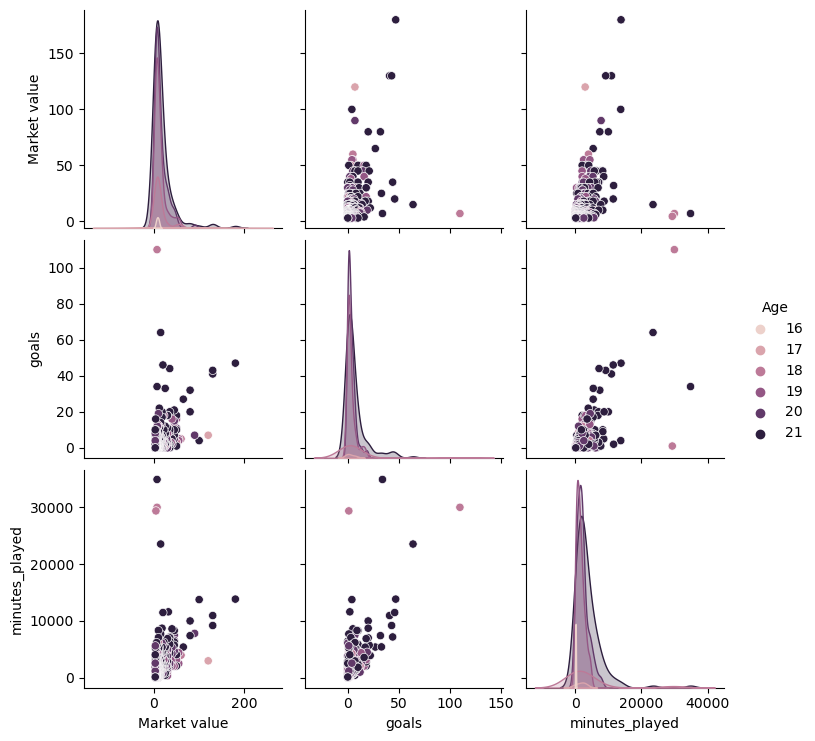

In [41]:
#Pairplot teniendo en cuenta varios valores y resaltando el "Age"

sns.pairplot(df_u21[["Market value", "goals", "minutes_played", "Age"]], hue='Age')

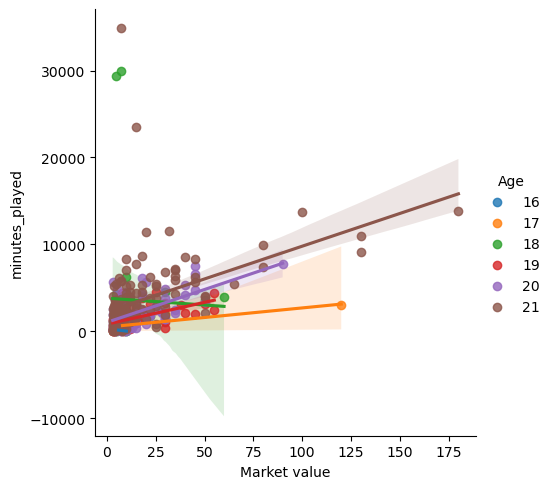

In [42]:
#Este gráfico de dispersión con regresión lineal muestra cómo varía el valor de mercado de los jugadores en función 
#de los minutos jugados, con una diferenciación de colores que indica la edad de los jugadores.

sns.lmplot(data=df_u21,
            x='Market value',
            y='minutes_played',
            hue='Age')

/var/folders/6k/hcdxyxmj1v348fnpgx98xbp40000gp/T/ipykernel_923/1860399048.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_u21, x='Age', y='Market value', ci=None)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


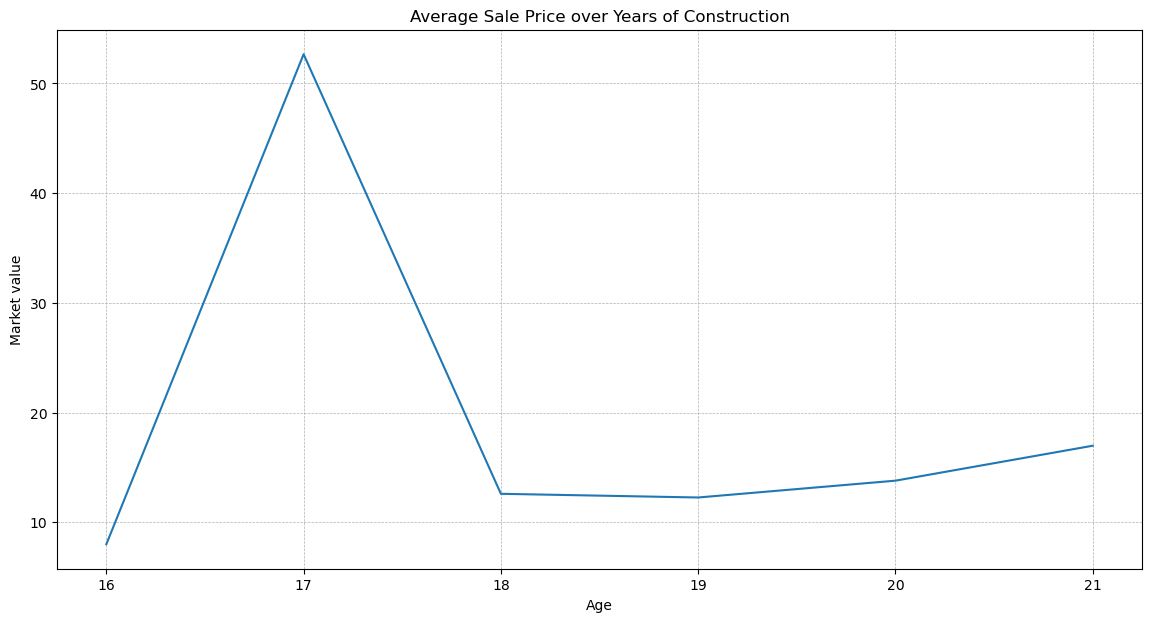

In [43]:
#La línea del gráfico muestra cómo el valor de mercado promedio de los jugadores cambia con la edad, revelando la 
#tendencia general del valor de mercado a medida que los jugadores envejecen.

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_u21, x='Age', y='Market value', ci=None)
plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

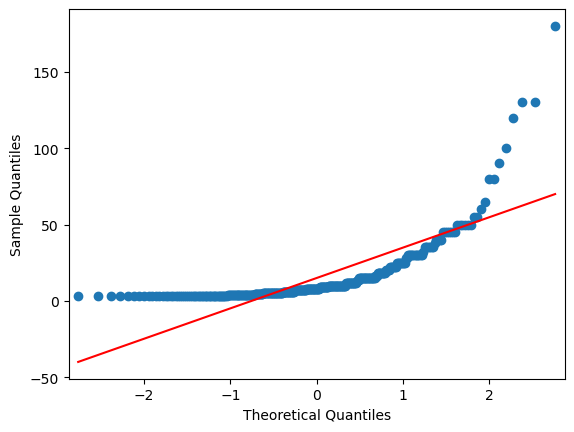

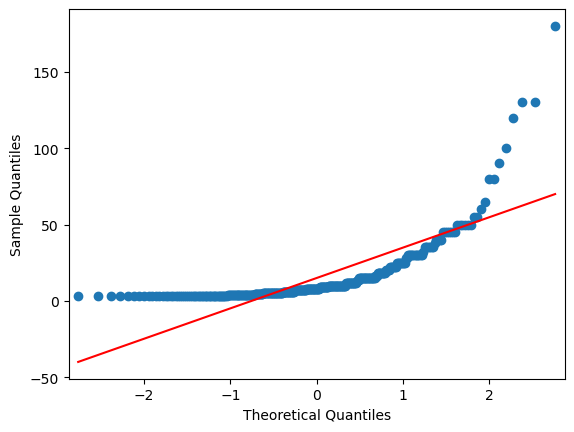

In [44]:
#El gráfico Q-Q (cuantil-cuantil) muestra la comparación entre la distribución del valor de mercado de los jugadores ('Market value') 
# y una distribución normal teórica, con una línea de referencia (line='s') que indica cómo los datos se ajustan a la distribución normal.

import statsmodels.api as sm

sm.qqplot(df_u21['Market value'], line='s')

#### Graficos específicos

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


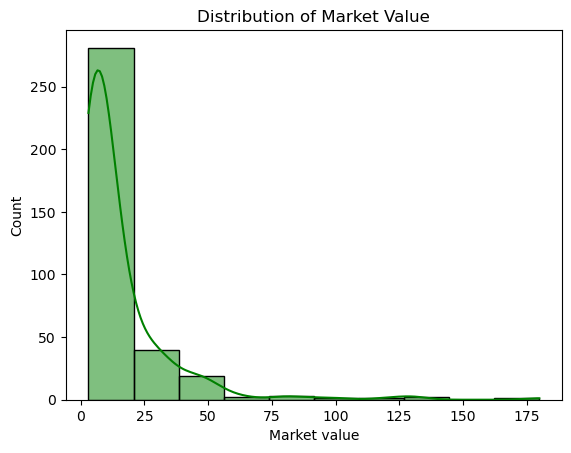

In [45]:
#Distribucion de el valor en el mercado por la cantidad de jugadores. Se puede apreciar que la mayoria estan entre 0 y 25
sns.histplot(df_u21['Market value'], bins=10, kde=True, color='green')
plt.title('Distribution of Market Value')
plt.show()


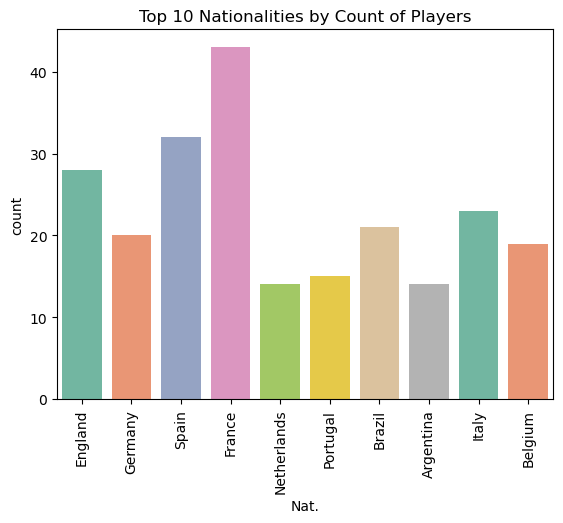

In [46]:
#Este grafico nos muestra los 10 países con mayor número de jugadores

top_nationalities = df_u21['Nat.'].value_counts().nlargest(10).index
sns.countplot(data=df_u21[df_u21['Nat.'].isin(top_nationalities)], x='Nat.', palette='Set2')
plt.xticks(rotation=90)
plt.title('Top 10 Nationalities by Count of Players')
plt.show()

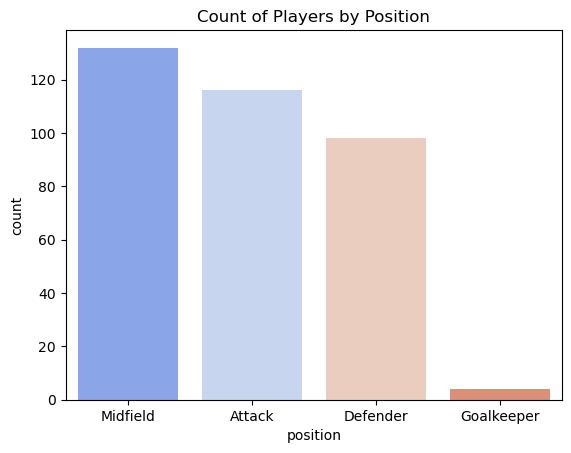

In [47]:
#En esta grafica podemos ver la distribucion de los jugadores por posiciones

sns.countplot(data=df_u21, x='position', palette='coolwarm')
plt.title('Count of Players by Position')
plt.show()


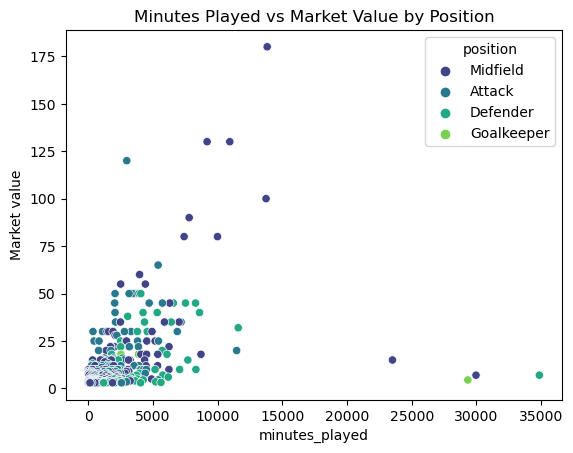

In [48]:
#El gráfico de dispersión ilustra la relación entre los minutos jugados ('minutes_played') y el valor de mercado 
# ('Market value') de los jugadores, diferenciando los puntos por posición ('position') mediante colores variados de la 
# paleta 'viridis', y permite observar cómo estas variables se relacionan según la posición en el campo

sns.scatterplot(data=df_u21, x='minutes_played', y='Market value', hue='position', palette='viridis')
plt.title('Minutes Played vs Market Value by Position')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

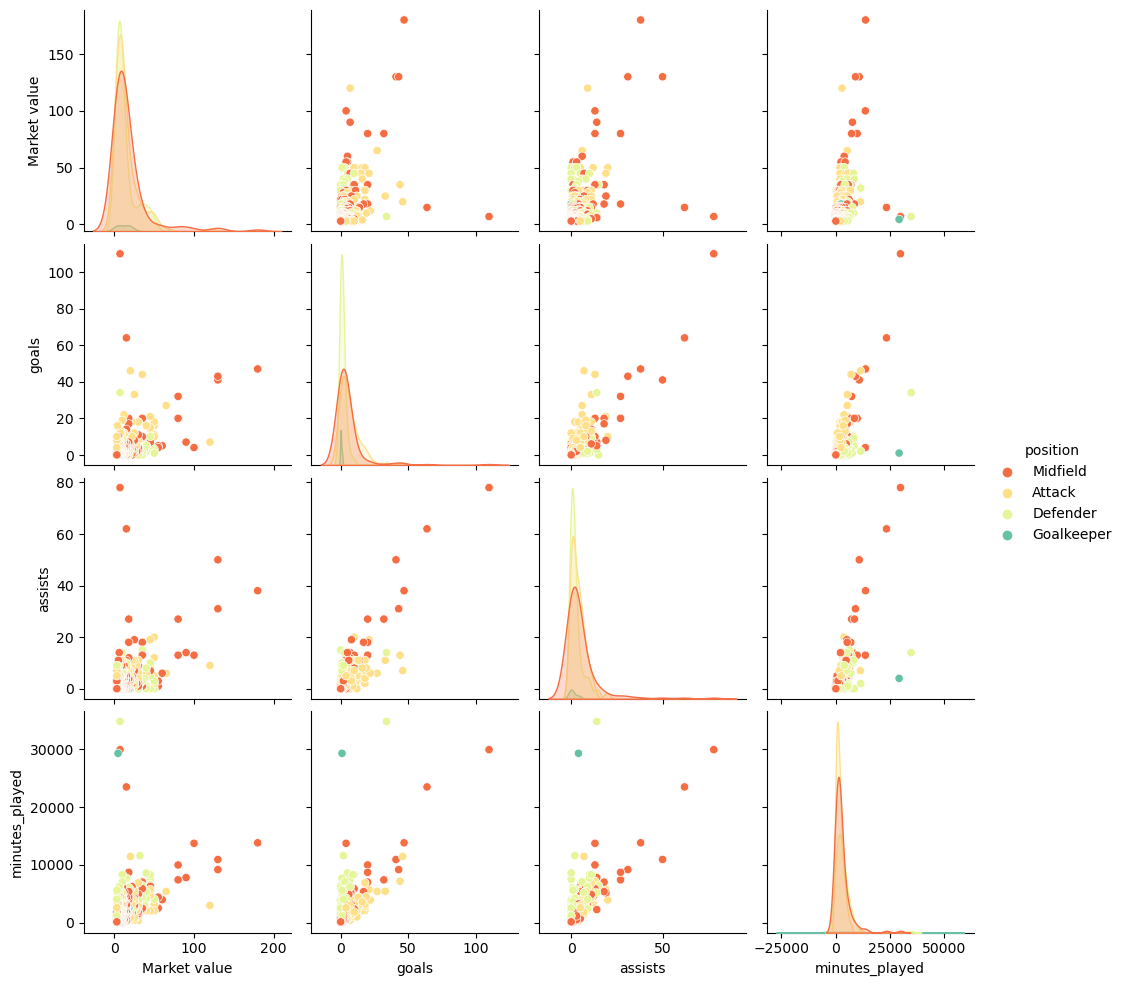

In [49]:
#El gráfico pairplot muestra cómo se relacionan entre sí el valor de mercado, los goles, las asistencias y los minutos jugados de los jugadores, 
# diferenciando los puntos por su posición en el campo con colores distintos.

sns.pairplot(df_u21[['Market value', 'goals', 'assists', 'minutes_played', 'position']], hue='position', palette='Spectral')
plt.show()

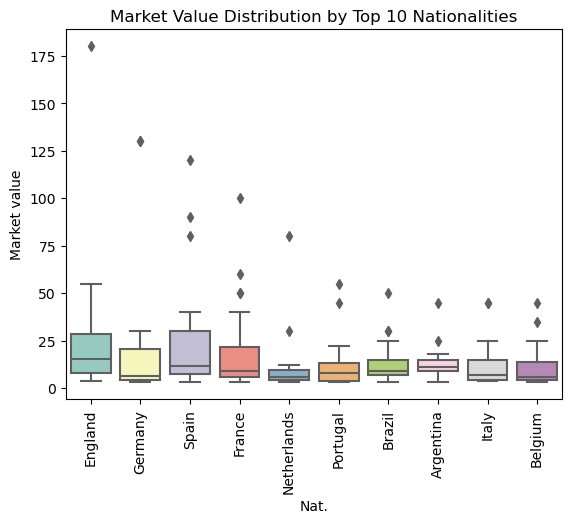

In [50]:
#El gráfico de cajas muestra cómo varía el valor de mercado de los jugadores entre las 10 nacionalidades más comunes

top_nationalities = df_u21['Nat.'].value_counts().nlargest(10).index
sns.boxplot(data=df_u21[df_u21['Nat.'].isin(top_nationalities)], x='Nat.', y='Market value', palette='Set3')
plt.xticks(rotation=90)
plt.title('Market Value Distribution by Top 10 Nationalities')
plt.show()


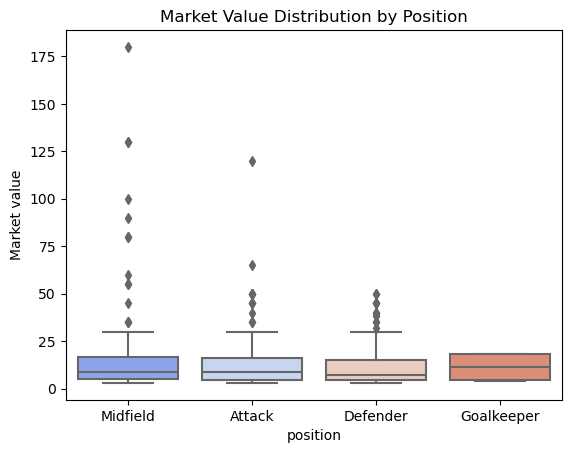

In [51]:
#El gráfico de cajas muestra la distribución del valor de mercado de los jugadores según su posición en el campo.

sns.boxplot(data=df_u21, x='position', y='Market value', palette='coolwarm')
plt.title('Market Value Distribution by Position')
plt.show()


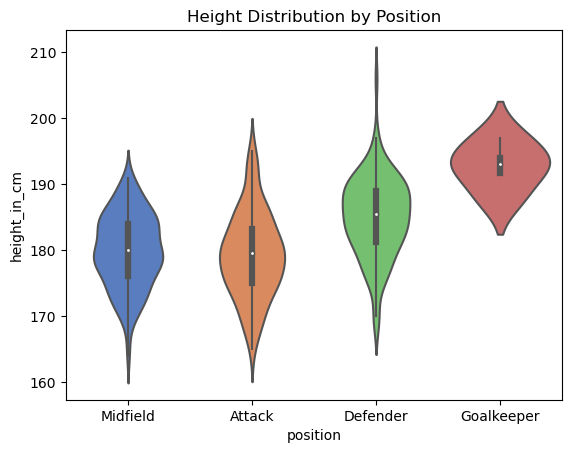

In [52]:
#El gráfico de violín muestra la distribución de la altura de los jugadores ('height_in_cm') según su posición en el campo 
# ('position'), con una visualización de la densidad de datos y la forma de la distribución para cada posición.

sns.violinplot(data=df_u21, x='position', y='height_in_cm', palette='muted')
plt.title('Height Distribution by Position')
plt.show()


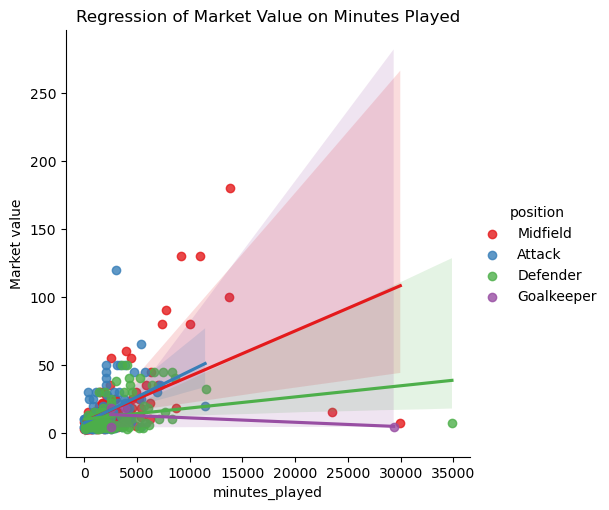

In [53]:
#El gráfico muestra la relación entre el valor de mercado y los minutos jugados de los jugadores, con colores que indican su posición en el campo.

sns.lmplot(data=df_u21, x='minutes_played', y='Market value', hue='position', palette='Set1')
plt.title('Regression of Market Value on Minutes Played')
plt.show()


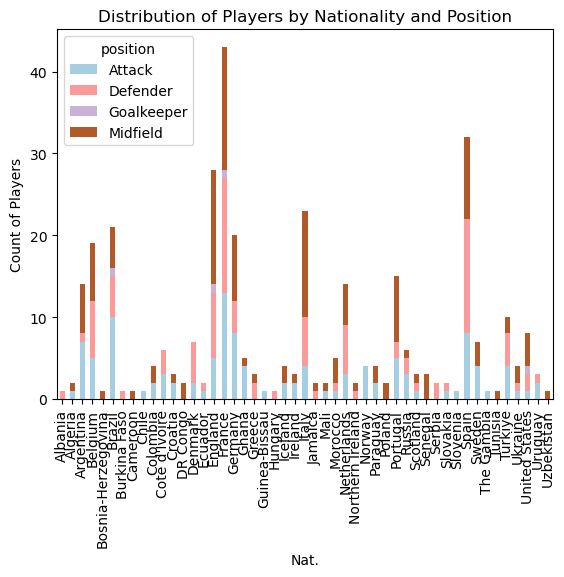

In [54]:
# El gráfico de barras apiladas muestra la distribución de los jugadores por nacionalidad y posición, 
# con diferentes colores representando cada posición.

pd.crosstab(df_u21['Nat.'], df_u21['position']).plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Distribution of Players by Nationality and Position')
plt.ylabel('Count of Players')
plt.show()


# Jugadores FIFA

## EDA

#### Dataframe

In [55]:
df_u21_fifa = pd.read_csv("../Datos/fifa_players_u21.csv")

In [56]:
#Vemos la forma de la tabla que vamos a usar, en este caso tiene 350 lineas y 12 columnas

df_u21_fifa.shape

(2000, 18)

In [57]:
df_u21_fifa.dtypes

name            object
nation          object
position        object
age              int64
overall          int64
potential        int64
total_gk         int64
total_stats      int64
pace             int64
shooting         int64
passing          int64
dribbling        int64
defending        int64
physical         int64
team            object
altura           int64
foot            object
cost           float64
dtype: object

#### Separar las columnas numéricas

In [58]:
# Separamos las columnas numéricas

df_u21_fifa.select_dtypes("number").columns

Index(['age', 'overall', 'potential', 'total_gk', 'total_stats', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physical', 'altura',
       'cost'],
      dtype='object')

In [59]:
#Las organizamos por los valores únicos que tienen

df_u21_fifa.select_dtypes("number").nunique().sort_values(ascending=False)

total_stats    637
cost           102
total_gk        87
defending       66
shooting        61
dribbling       53
pace            52
passing         50
physical        49
altura          43
overall         26
potential       23
age              6
dtype: int64

In [60]:
#Vemos en este caso que Age tiene 6 valores unicos, la mayoria tiene 21 años, y los que menos tienen, 16

df_u21_fifa['age'].value_counts()

age
21    715
20    570
19    401
18    225
17     75
16     14
Name: count, dtype: int64

In [61]:
#creamos un df con solo valores numericos

numerical_colums_fifa= df_u21_fifa.select_dtypes(include=[np.number])
numerical_colums_fifa

,age,overall,potential,total_gk,total_stats,pace,shooting,passing,dribbling,defending,physical,altura,cost
0,20,86,93,42,2090,85,75,76,91,63,61,184,134.5
1,20,88,92,48,2295,80,83,81,87,78,83,186,128.5
2,20,87,92,57,2089,80,76,86,88,50,63,177,118.5
3,20,86,92,46,2138,78,69,82,88,70,74,174,105.0
4,21,86,90,50,2196,85,82,81,88,60,70,178,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20,63,75,314,918,64,62,61,67,21,60,186,1.0
1996,19,62,79,59,1502,76,61,51,65,21,47,182,1.0
1997,19,62,78,47,1439,77,55,53,65,23,43,180,1.0
1998,19,62,80,51,1450,74,54,56,63,25,46,176,1.0


#### Separar las columnas categóricas

In [62]:
#Creamos un df con solo valores categoricos

categorical_columns_fifa = df_u21_fifa.select_dtypes(include='object')
categorical_columns_fifa

,name,nation,position,team,foot
0,Jamal Musiala,Germany,CAM,FC Bayern München,Right
1,Jude Bellingham,England,CAM,Real Madrid,Right
2,Florian Wirtz,Germany,CAM,Bayer 04 Leverkusen,Right
3,Pedro González López,Spain,CM,FC Barcelona,Right
4,Bukayo Saka,England,RW,Arsenal,Left
...,...,...,...,...,...
1995,Thimothée Lo-Tutala,France,GK,Doncaster Rovers,Right
1996,Manuel Morillo León,Spain,ST,Real Betis,Right
1997,Antonino Jastin García López,Portugal,LM,Girona,Right
1998,Iker Almena Horcajo,Spain,RM,Girona,Left


#### Análisis categóricos

In [63]:
#En este caso vemos la frecuencia de las posiciones. Podemos ver que lo que mas hay son mediocampistas, seguido de atacantes, defensas y solo 4 porteros

frequency_table = df_u21_fifa['position'].value_counts()

proportion_table = df_u21_fifa['position'].value_counts(normalize=True)

frequency_table, proportion_table

(position
 CB     292
 CM     266
 ST     263
 LM     162
 RM     158
 CDM    148
 CAM    144
 LB     132
 RB     128
 GK      95
 RW      77
 LW      64
 RWB     26
 LWB     25
 CF      20
 Name: count, dtype: int64,
 position
 CB     0.1460
 CM     0.1330
 ST     0.1315
 LM     0.0810
 RM     0.0790
 CDM    0.0740
 CAM    0.0720
 LB     0.0660
 RB     0.0640
 GK     0.0475
 RW     0.0385
 LW     0.0320
 RWB    0.0130
 LWB    0.0125
 CF     0.0100
 Name: proportion, dtype: float64)

<Axes: xlabel='position'>

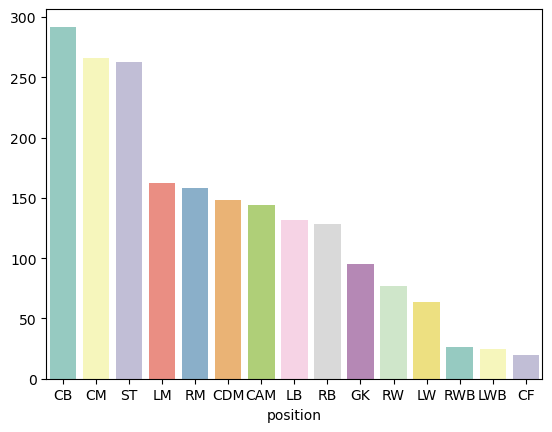

In [64]:
#En esta grafica podemos ver la distribución de los jugadores por posiciones

sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")

<Axes: ylabel='count'>

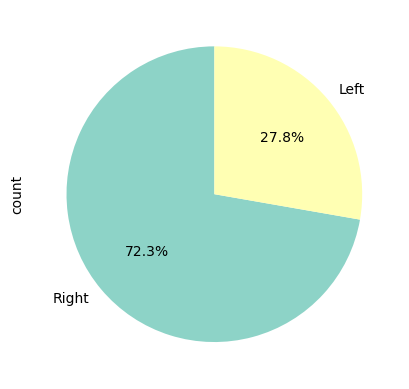

In [65]:
df_u21_fifa['foot'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

#### Análisis Numéricos

<Axes: xlabel='age', ylabel='count'>

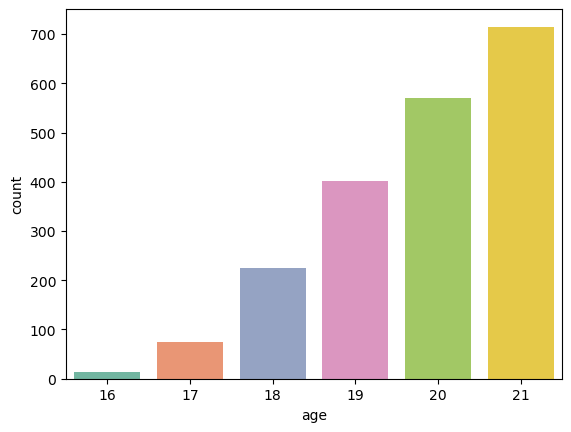

In [66]:
#En esta gráfica podemos ver la distrubición de los jugadores por cada grupo de edad

sns.countplot(data=df_u21_fifa, x='age', palette="Set2")

In [67]:
#La media, la mediana y la moda de Market Value

mean_price = df_u21_fifa['cost'].mean()
median_price = df_u21_fifa['cost'].median()
mode_price = df_u21_fifa['cost'].mode()[0]

mean_price, median_price, mode_price

(3.8984500000000004, 1.9, 1.1)

In [68]:
#Más análisis de Market value

variance_price = df_u21_fifa['cost'].var()
std_dev_price = df_u21_fifa['cost'].std()
min_price = df_u21_fifa['cost'].min()
max_price = df_u21_fifa['cost'].max()
range_price = max_price - min_price
quantiles_price = df_u21_fifa['cost'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(67.78686603051534,
 8.233277963880203,
 1.0,
 134.5,
 133.5,
 0.25    1.3
 0.50    1.9
 0.75    3.2
 Name: cost, dtype: float64)

In [69]:
skewness_value = df_u21_fifa['cost'].skew()
kurtosis_value = df_u21_fifa['cost'].kurtosis()

skewness_value, kurtosis_value

(8.782613186865294, 105.13388579705209)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'potential'}>,
        <Axes: title={'center': 'total_gk'}>],
       [<Axes: title={'center': 'total_stats'}>,
        <Axes: title={'center': 'pace'}>,
        <Axes: title={'center': 'shooting'}>,
        <Axes: title={'center': 'passing'}>],
       [<Axes: title={'center': 'dribbling'}>,
        <Axes: title={'center': 'defending'}>,
        <Axes: title={'center': 'physical'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'cost'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

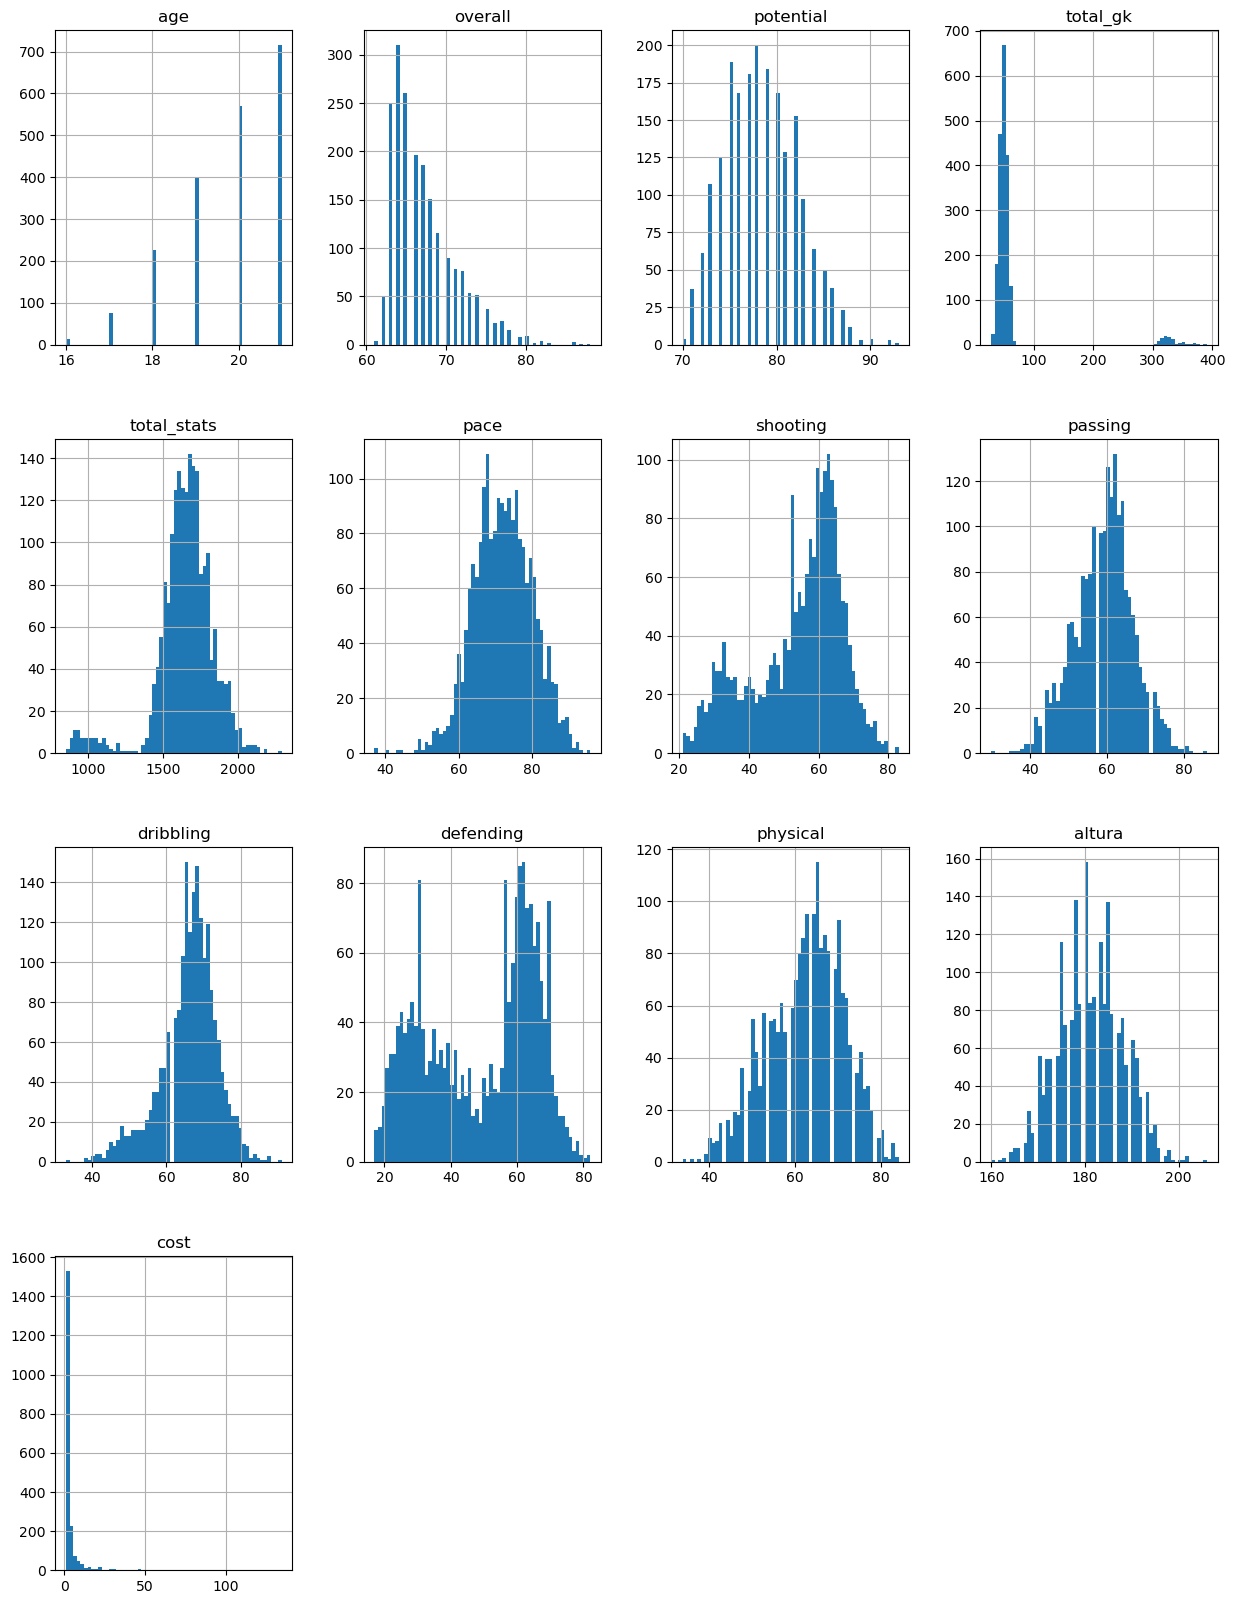

In [70]:
#Graficos de las columnas numéricas

numerical_colums_fifa.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)

<Axes: >

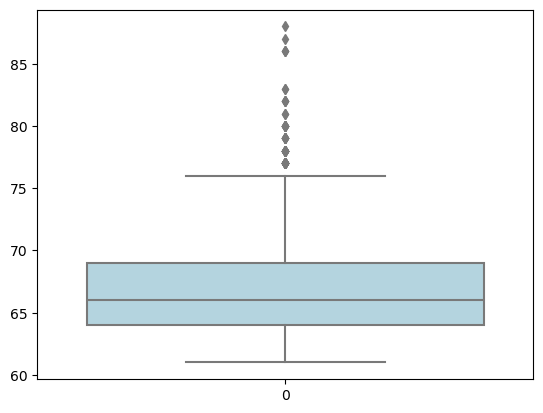

In [71]:
#Boxplot de Market Value. Lo que nos dice que la mayoria de los valores estan aprox entre 0 y 25

sns.boxplot(data = df_u21_fifa['overall'], color="lightblue")

In [72]:
crosstab_result =pd.crosstab(df_u21_fifa['position'], df_u21_fifa['age'])
crosstab_result

age,16,17,18,19,20,21
position,,,,,,
CAM,4,10,23,31,37,39
CB,4,4,25,54,86,119
CDM,0,5,20,29,45,49
CF,0,3,5,2,1,9
CM,3,11,38,53,71,90
GK,0,2,6,14,27,46
LB,0,6,12,28,38,48
LM,0,4,15,30,55,58
LW,1,2,11,13,15,22


In [73]:
from scipy.stats import chi2_contingency
chi2_statistics, chi_p_value, _, _ = chi2_contingency (crosstab_result)
chi2_statistics, chi_p_value

(96.47134465544313, 0.01972405602297882)

In [74]:
from scipy.stats.contingency import association
association (crosstab_result, method = 'cramer')

0.09821982725266988

<Axes: xlabel='position'>

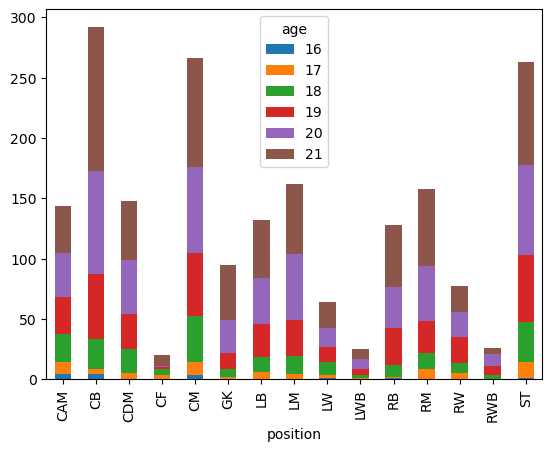

In [75]:
#Grafico de barras apiladas viendo las diferentes edades por cada posicion

crosstab_result.plot (kind="bar", stacked = True)

<Axes: xlabel='age', ylabel='count'>

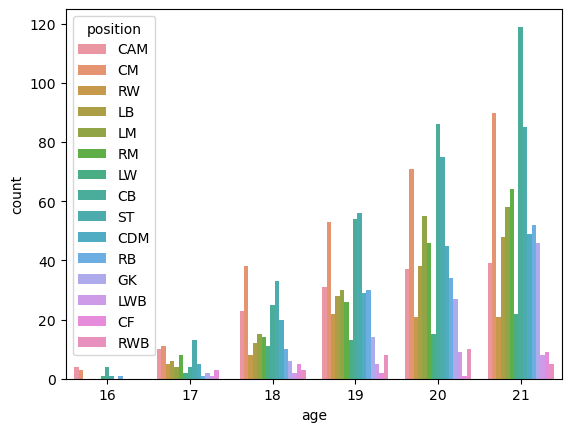

In [76]:
#Grafico de barras con las edades y los numeros de jugadores por posición

sns.countplot(data=df_u21_fifa, x='age', hue='position')

<Axes: xlabel='age', ylabel='position'>

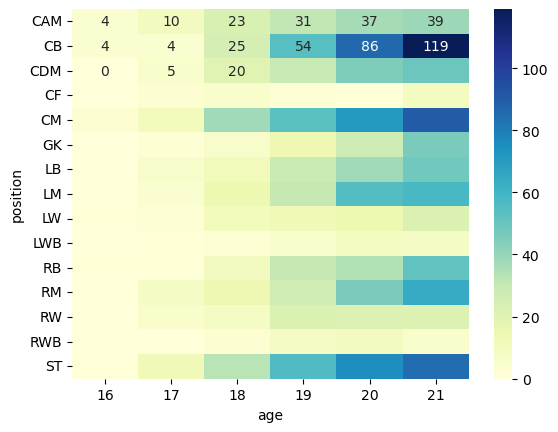

In [77]:
sns.heatmap (crosstab_result, annot=True, cmap="YlGnBu", fmt="d")

<Axes: xlabel='age', ylabel='overall'>

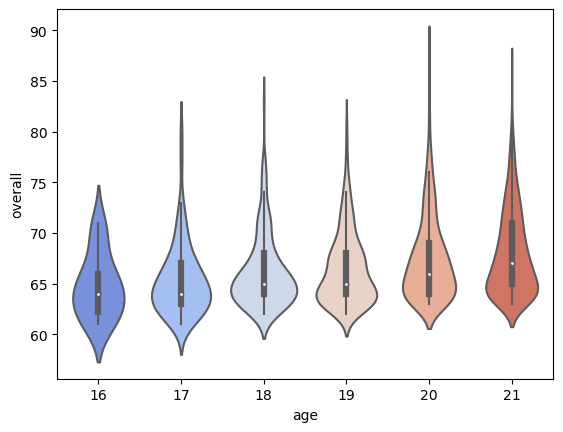

In [78]:
sns.violinplot (data=df_u21_fifa, x= 'age', y= 'overall', palette='coolwarm')

<Axes: xlabel='position', ylabel='potential'>

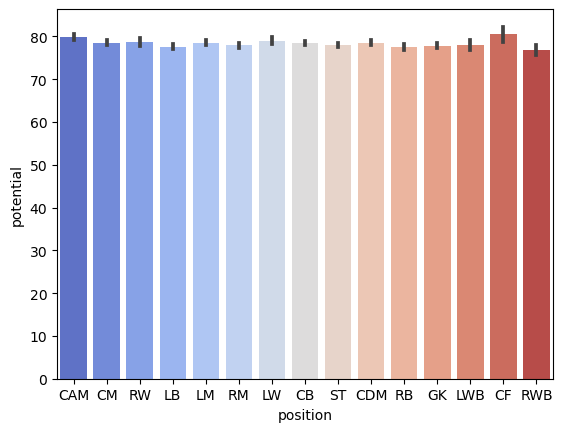

In [79]:

sns.barplot (data=df_u21_fifa, x= 'position', y= 'potential', palette='coolwarm')

In [80]:
#Creamos un grupo de las Top 10 nacionalidades para poder analizar mejor el gráfico

top_nationalities_fifa = df_u21_fifa['nation'].value_counts().nlargest(10).index

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'England'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'Portugal'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'United States'),
  Text(9, 0, 'Argentina')])

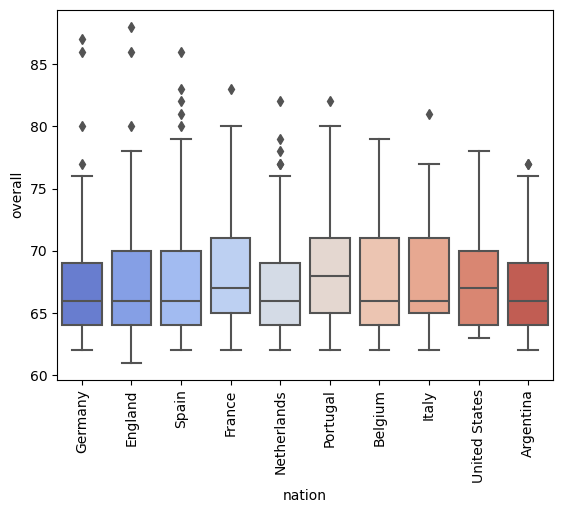

In [81]:
sns.boxplot(data=df_u21_fifa[df_u21_fifa['nation'].isin(top_nationalities_fifa)], x='nation', y='overall', palette='coolwarm')
plt.xticks(rotation=90)

#### Coorrelaciones 

In [82]:
#La correlación entre Overall y el costo

correlation = df_u21_fifa['overall'].corr(df_u21_fifa['cost'])
correlation

0.6982489504507197

In [83]:
correlation = df_u21_fifa['overall'].corr(df_u21_fifa['cost'], method='spearman')
correlation

0.9835619846160524

In [85]:

spearman_correlations = numerical_colums_fifa.corrwith(df_u21_fifa['overall'], method='spearman')


spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)


spearman_correlations_sorted

overall        1.000000
cost           0.983562
potential      0.604332
total_stats    0.584354
dribbling      0.572127
passing        0.514698
physical       0.330858
shooting       0.293082
pace           0.267314
defending      0.250555
age            0.200416
total_gk       0.014684
altura         0.009321
dtype: float64

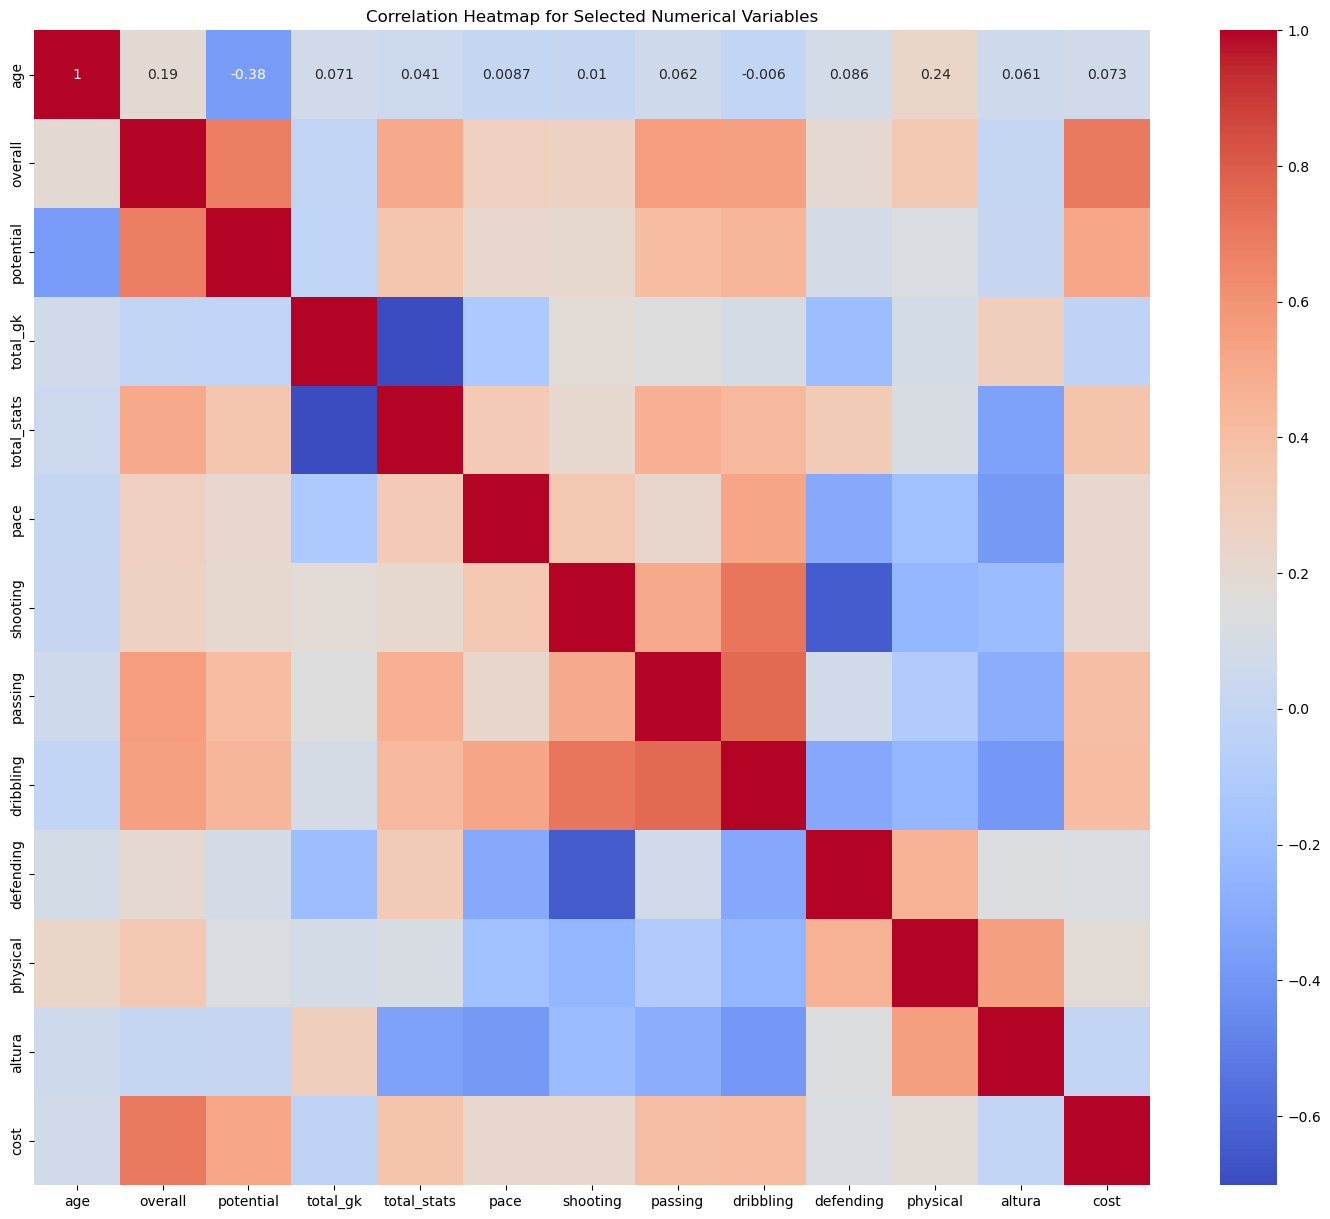

In [86]:
#Un matrix de correlación de los elementos numéricos de nuestro df

correlation_matrix = numerical_colums_fifa.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

<Axes: xlabel='cost', ylabel='overall'>

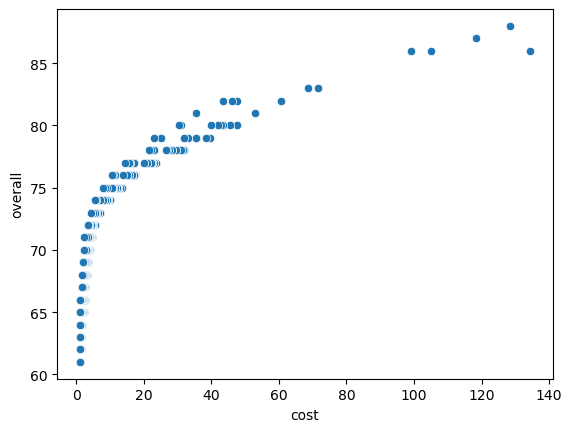

In [87]:
sns.scatterplot(data=df_u21_fifa, x='cost', y='overall')

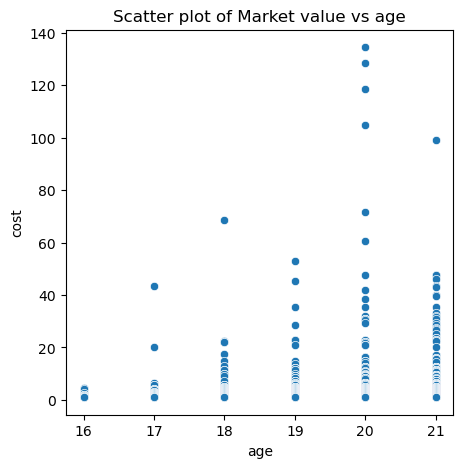

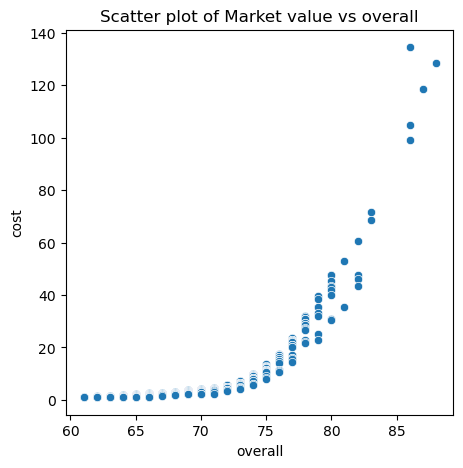

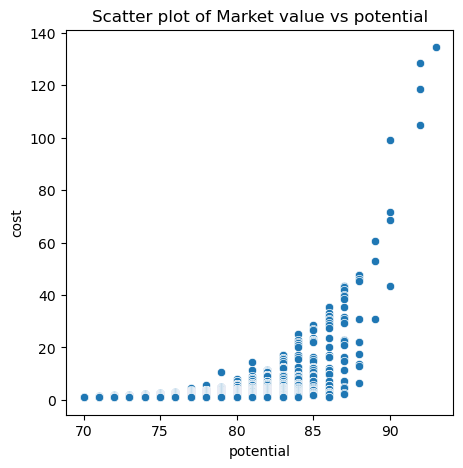

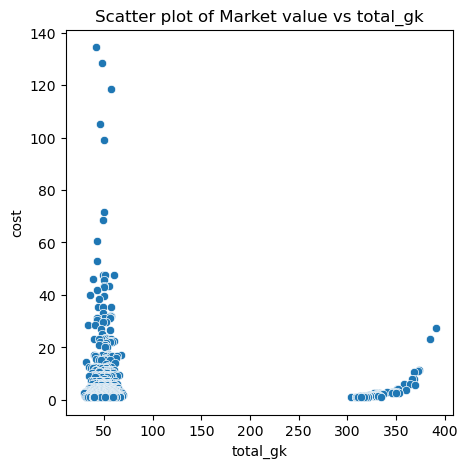

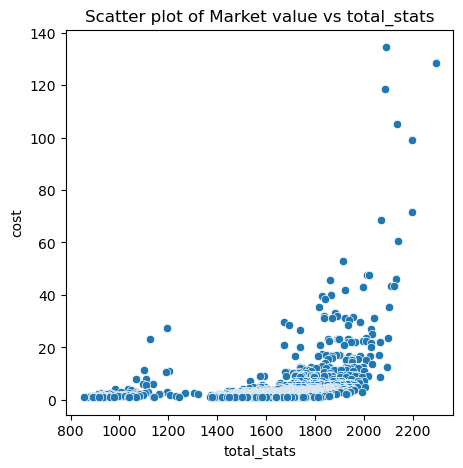

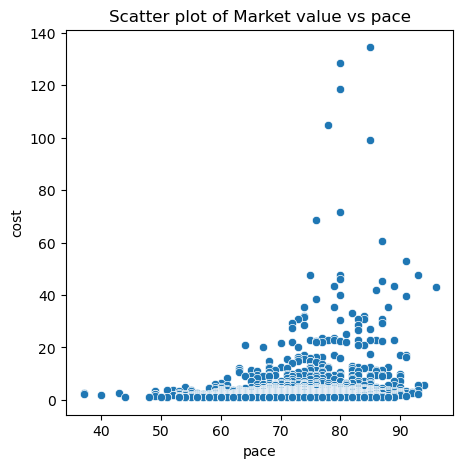

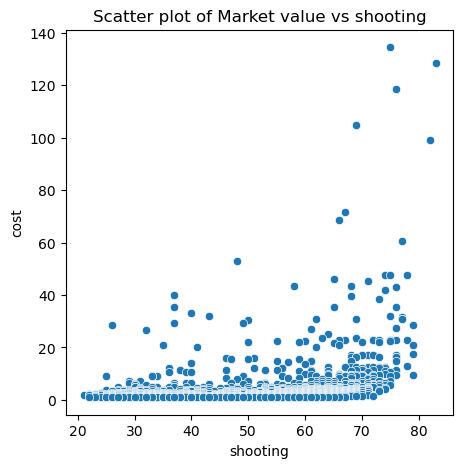

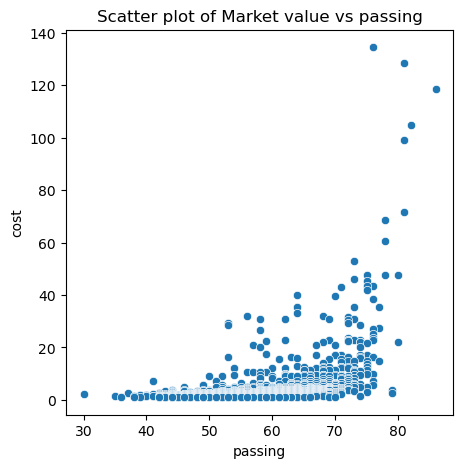

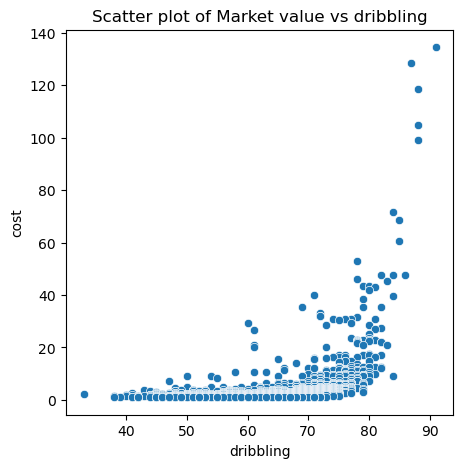

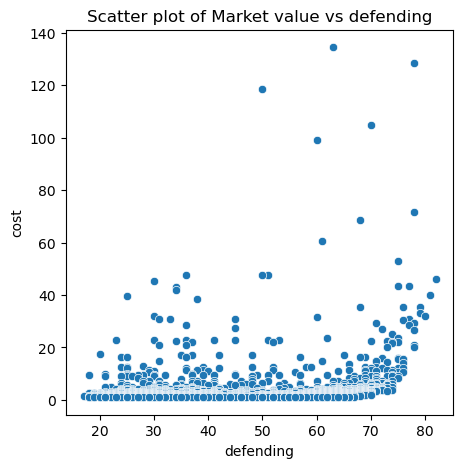

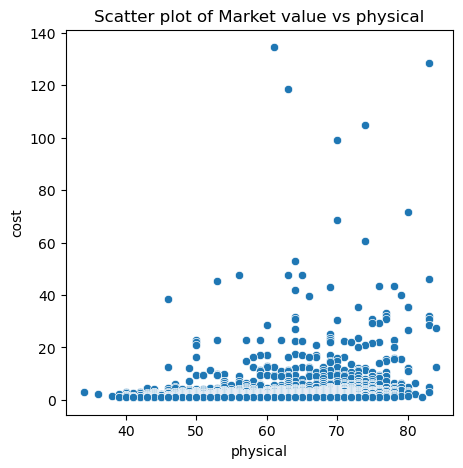

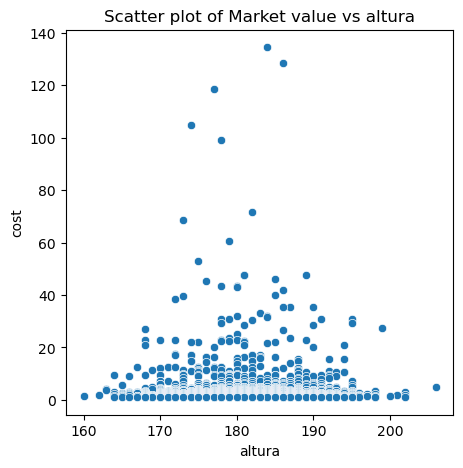

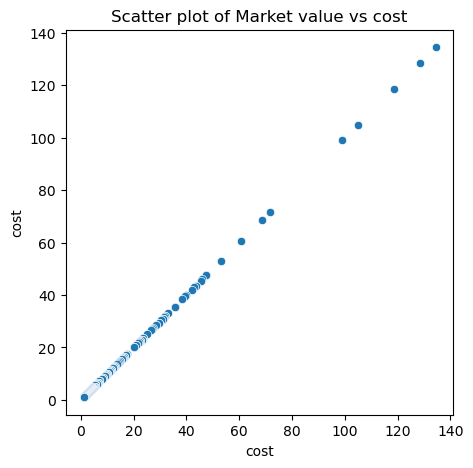

In [89]:
for col in numerical_colums_fifa.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Market value vs ' + col)
    sns.scatterplot(data=df_u21_fifa, x=col, y='cost')
    plt.show()

In [90]:
df_u21_fifa.columns

Index(['name', 'nation', 'position', 'age', 'overall', 'potential', 'total_gk',
       'total_stats', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physical', 'team', 'altura', 'foot', 'cost'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


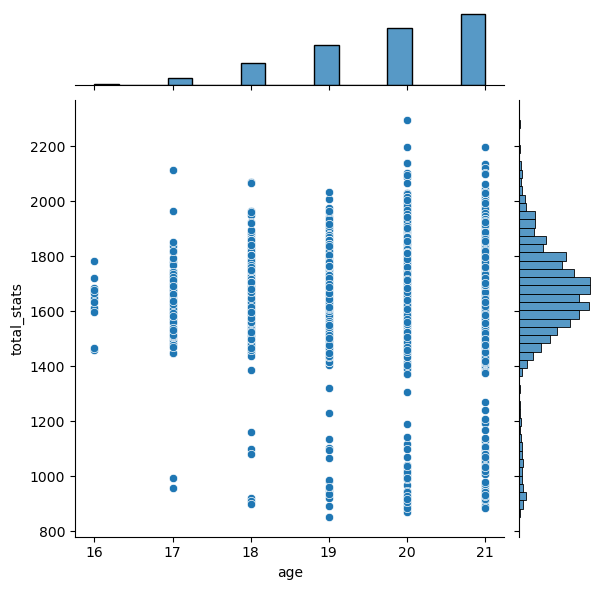

In [92]:
sns.jointplot(y=numerical_colums_fifa['total_stats'], x=numerical_colums_fifa['age'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


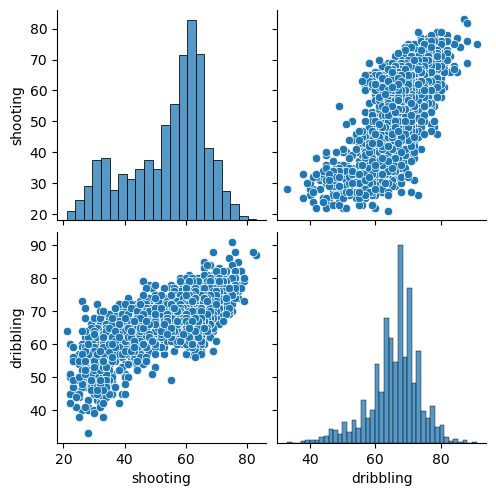

In [93]:
sns.pairplot(df_u21_fifa[["shooting", "dribbling"]])

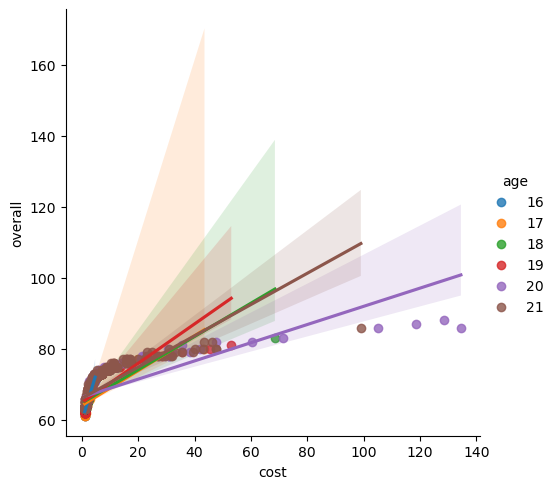

In [95]:
sns.lmplot(data=df_u21_fifa,
            x='cost',
            y='overall',
            hue='age')

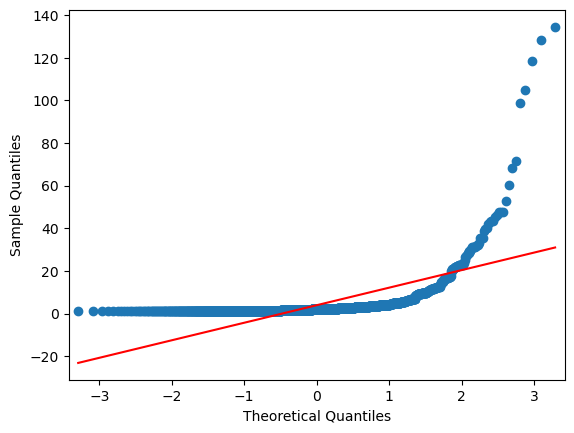

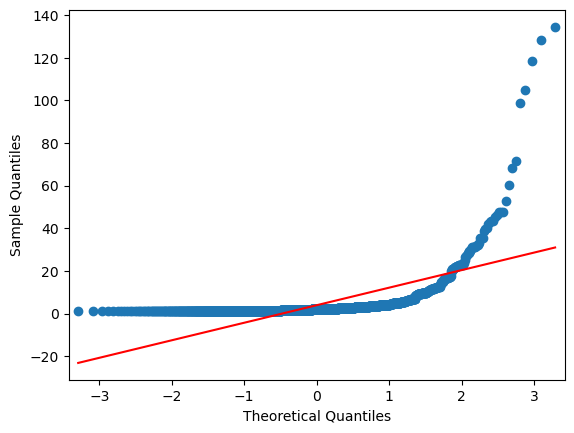

In [97]:
sm.qqplot(df_u21_fifa['cost'], line='s')

#### Graficos específicos

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


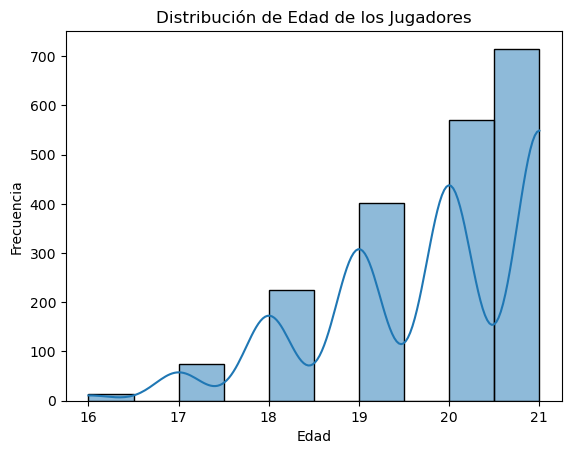

In [99]:
sns.histplot(df_u21_fifa['age'], bins=10, kde=True)
plt.title('Distribución de Edad de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


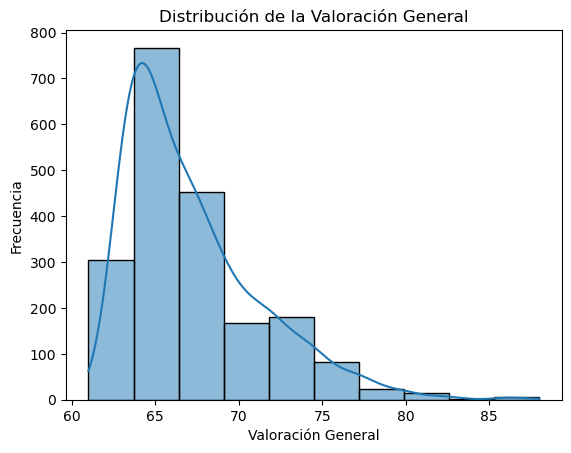

In [100]:
sns.histplot(df_u21_fifa['overall'], bins=10, kde=True)
plt.title('Distribución de la Valoración General')
plt.xlabel('Valoración General')
plt.ylabel('Frecuencia')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


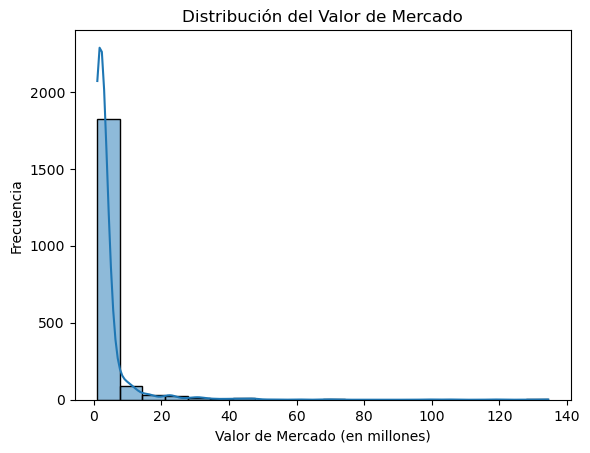

In [101]:
sns.histplot(df_u21_fifa['cost'], bins=20, kde=True)
plt.title('Distribución del Valor de Mercado')
plt.xlabel('Valor de Mercado (en millones)')
plt.ylabel('Frecuencia')
plt.show()

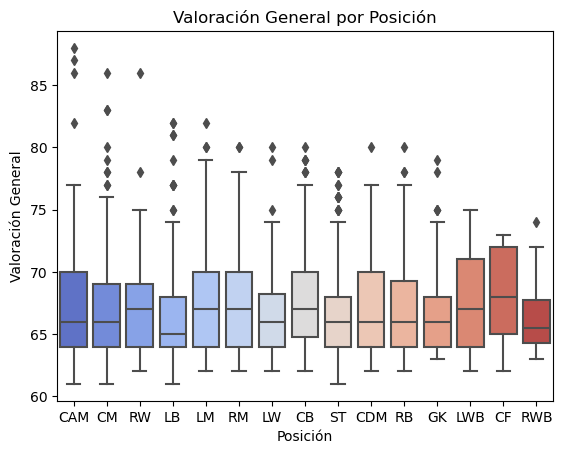

In [102]:
sns.boxplot(data=df_u21_fifa, x='position', y='overall', palette='coolwarm')
plt.title('Valoración General por Posición')
plt.xlabel('Posición')
plt.ylabel('Valoración General')
plt.show()

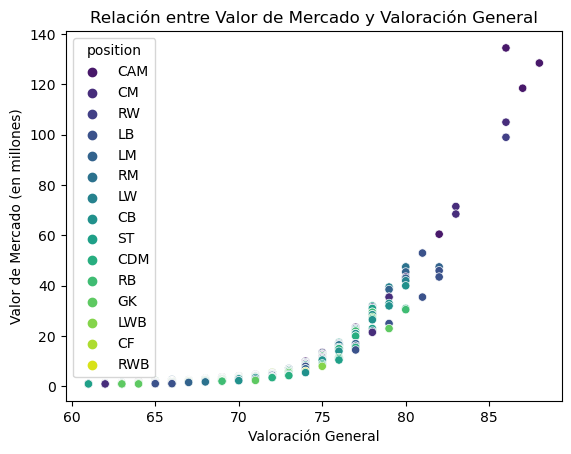

In [106]:
sns.scatterplot(data=df_u21_fifa, x='overall', y='cost', hue='position', palette='viridis')
plt.title('Relación entre Valor de Mercado y Valoración General')
plt.xlabel('Valoración General')
plt.ylabel('Valor de Mercado (en millones)')
plt.show()

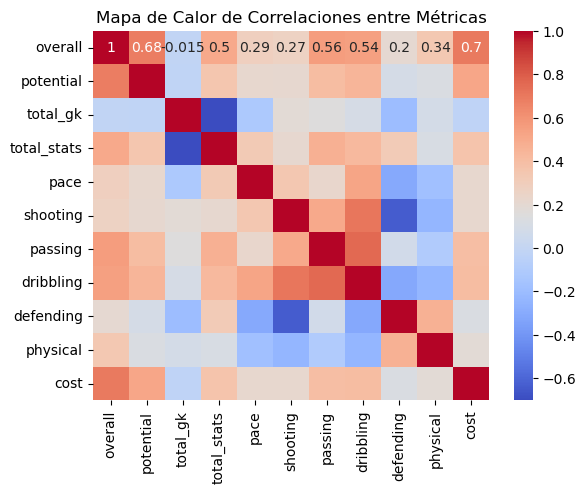

In [108]:
corr = df_u21_fifa[['overall', 'potential', 'total_gk', 'total_stats', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physical', 'cost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Métricas')
plt.show()

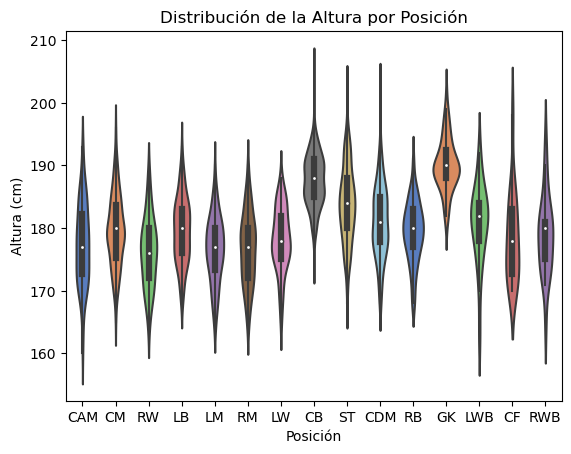

In [109]:
sns.violinplot(data=df_u21_fifa, x='position', y='altura', palette='muted')
plt.title('Distribución de la Altura por Posición')
plt.xlabel('Posición')
plt.ylabel('Altura (cm)')
plt.show()

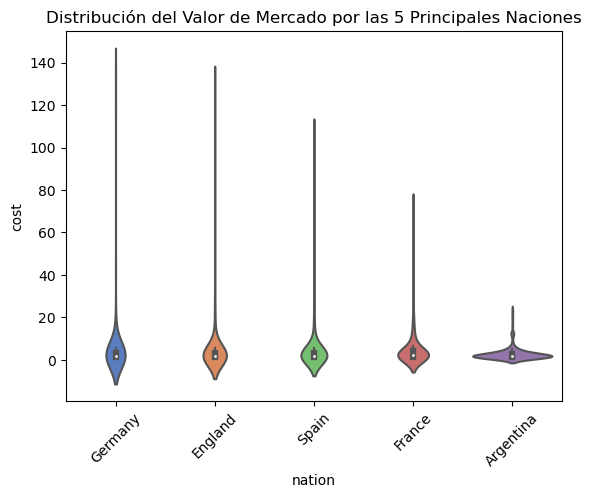

In [111]:
top_nations = df_u21_fifa['nation'].value_counts().nlargest(5).index
sns.violinplot(data=df_u21_fifa[df_u21_fifa['nation'].isin(top_nations)], x='nation', y='cost', palette='muted')
plt.title('Distribución del Valor de Mercado por las 5 Principales Naciones')
plt.xticks(rotation=45)
plt.show()

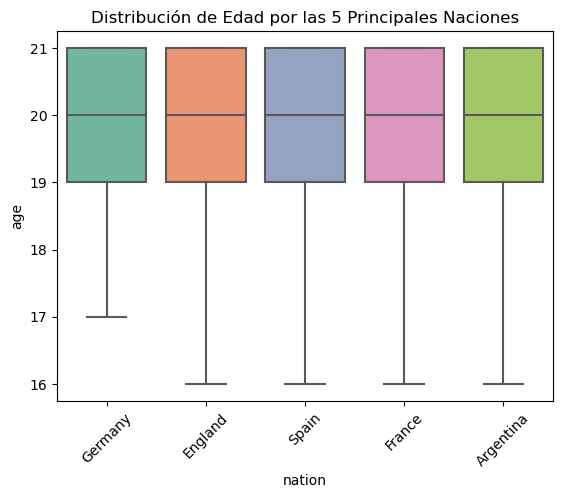

In [112]:
top_nations = df_u21_fifa['nation'].value_counts().nlargest(5).index
sns.boxplot(data=df_u21_fifa[df_u21_fifa['nation'].isin(top_nations)], x='nation', y='age', palette='Set2')
plt.title('Distribución de Edad por las 5 Principales Naciones')
plt.xticks(rotation=45)
plt.show()

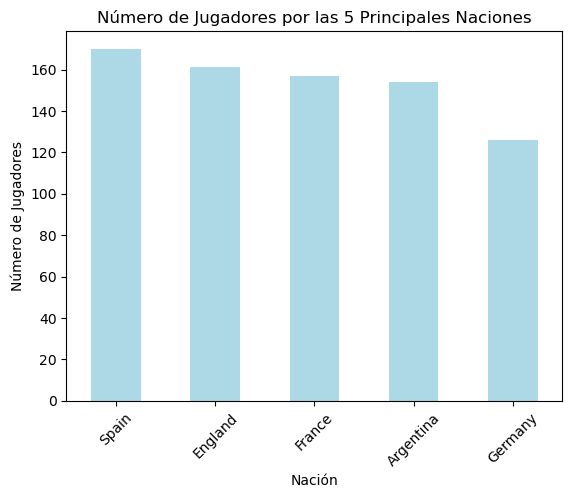

In [114]:
top_nations = df_u21_fifa['nation'].value_counts().nlargest(5)
top_nations.plot(kind='bar', color='lightblue')
plt.title('Número de Jugadores por las 5 Principales Naciones')
plt.xlabel('Nación')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=45)
plt.show()